# <p style="background-color:#fbaa7f  ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Fraud Detection</p>

<img src="one.jpg" width="1800"> 

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:120%; text-align:left">

<h3 align="left"><font color=brown>Problem:</font></h3>

<h3 align="left"><font color=black>The increasing volume of mobile financial transactions has led to a corresponding rise in fraudulent activities, posing significant financial risks to both businesses and consumers. Current methods of fraud detection may lack the precision and speed required to identify fraudulent transactions in real-time, leading to financial losses and compromised security. The challenge is to develop an accurate and efficient solution that can detect and prevent fraudulent transactions as they occur, without hindering the user experience.
</font></h3>

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Objectives:</font></h3>

<h3 align="left"><font color=black>

* __Explore the Dataset:__ Uncover patterns, distributions, and relationships within the data to gain a comprehensive understanding of the factors influencing fraud detection.

* __Conduct Extensive Exploratory Data Analysis (EDA):__ Analyze bivariate relationships against the target variable to identify significant predictors of fraudulent transactions.

* __Preprocessing Steps:__

    -Remove irrelevant features that do not contribute to the predictive power of the model.

    -Address missing values to ensure data completeness and integrity.

    -Treat outliers to reduce their impact on model performance.

    -Encode categorical variables to convert them into a format suitable for machine learning algorithms.

    -Transform skewed features to achieve normal-like distributions, enhancing model accuracy.

* __Model Building:__

    -Establish pipelines for models that require scaling to ensure consistent performance.

    -Implement and tune classification models, including Logistic Regression, SVM, Decision Trees, and Random Forest, to identify fraudulent transactions.

    -Emphasize achieving high precision for classifying fraudulent transactions, ensuring the model can effectively distinguish between legitimate and fraudulent activities.

* __Evaluate and Compare Model Performance:__ Utilize metrics such as precision, recall, F1-score, and ROC AUC to assess and compare the effectiveness of the models in accurately detecting fraudulent transactions.</font></h3>


<img src="" width="1800">

<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 15px; background-color:white ; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Dataset Overview](#overview)
    - [Step 3.1 | Dataset Basic Information](#basic)
    - [Step 3.2 | Summary Statistics for Numerical Variables](#num_statistics)
    - [Step 3.3 | Summary Statistics for Categorical Variables](#cat_statistics)
* [Step 4 | EDA](#eda)
    - [Step 4.1 | Univariate Analysis](#univariate)
        - [Step 4.1.1 | Numerical Variables Univariate Analysis](#num_uni)
        - [Step 4.1.2 | Categorical Variables Univariate Analysis](#cat_uni)
    - [Step 4.2 | Bivariate Analysis](#bivariate)
        - [Step 4.2.1 | Numerical Features vs Target](#num_target)
        - [Step 4.2.2 | Categorical Features vs Target](#cat_target)
* [Step 5 | Data Preprocessing](#preprocessing)
    - [Step 5.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 5.2 | Missing Value Treatment](#missing)
    - [Step 5.3 | Outlier Treatment](#outlier)
    - [Step 5.4 | Categorical Features Encoding](#encoding)
    - [Step 5.5 | Feature Scaling](#scaling)
* [Step 6 | Decision Tree Model Building](#dt)
    - [Step 6.1 | DT Base Model Definition](#dt_base)
    - [Step 6.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 6.3 | DT Model Evaluation](#dt_eval)
* [Step 7 | Random Forest Model Building](#rf)
    - [Step 7.1 | RF Base Model Definition](#rf_base)
    - [Step 7.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 7.3 | RF Model Evaluation](#rf_eval)
* [Step 8 | Logistic Regression Model Building](#logistic)
    - [Step 8.1 | Logistic Base Model Definition](#logistic_base)
    - [Step 8.2 | Logistic Hyperparameter Tuning](#logistic_hp)
    - [Step 8.3 | Logistic Model Evaluation](#logistic_eval)
* [Step 9 | SVM Model Building](#svm)
    - [Step 9.1 | SVM Base Model Definition](#svm_base)
    - [Step 9.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 9.3 | SVM Model Evaluation](#svm_eval)
* [Step 11 | Conclusion](#conclusion)
* [Step 12 | Prediction](#prediction)

<h2 align="left"><font color=brown>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [1]:

# Import essential libraries
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
%matplotlib inline

# Import libraries for data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from scipy.stats import boxcox

# Import libraries for model selection and evaluation
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import mean_squared_error, r2_score, classification_report, accuracy_score, confusion_matrix, roc_auc_score

# Import machine learning models
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Import libraries for interactive widgets and display in Jupyter Notebook
import ipywidgets as widgets
from IPython.display import display, HTML

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

In [2]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 200

# Configure Seaborn plot styles: Set background color and use dark| grid
sns.set(rc={'axes.facecolor': '#faded9'}, style='darkgrid')

<a id="read"></a>
# <p style="background-color:#fbaa7f ; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:115%; color:brown; text-align:left">

First of all, let's load the dataset:

In [3]:
df = pd.read_csv("D:\\BIA\\Capstone project\\Fraud_Analysis_Dataset.csv")
df

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1  TRANSFER     181.00  C1305486145         181.00            0.00   
1         1  CASH_OUT     181.00   C840083671         181.00            0.00   
2         1  TRANSFER    2806.00  C1420196421        2806.00            0.00   
3         1  CASH_OUT    2806.00  C2101527076        2806.00            0.00   
4         1  TRANSFER   20128.00   C137533655       20128.00            0.00   
...     ...       ...        ...          ...            ...             ...   
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
0       C553264065            0.00            0.00        1  
1        C38997010        21182.00            0.00        1  
2       C972765878            0.00            0.00        1  
3      C1007251739        26202.00            0.00        1  
4      C1848415041            0.00            0.00        1  
...            ...             ...             ...      ...  
11137   C684896216       478421.00       210535.25        0  
11138  C1761353343       704355.36      5270364.19        0  
11139  C1298316171       610479.00       749621.53        0  
11140   M983553548            0.00            0.00        0  
11141   M609545864            0.00            0.00        0  

[11142 rows x 10 columns]

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:120%;color:brown; text-align:left">

<h2 align="left"><font color=black>Dataset Description:</font></h2>
    
Here's a brief description of each column in the dataset:

| **Column Name**     | **Description**                                                                                             |
|---------------------|-------------------------------------------------------------------------------------------------------------|
| **step**            | The unit of time at which the transaction occurred, likely representing hours or another time measure.       |
| **type**            | The type of financial transaction (e.g., PAYMENT, TRANSFER, CASH_OUT, etc.).                                 |
| **amount**          | The amount of money involved in the transaction.                                                             |
| **nameOrig**        | The unique identifier for the origin account of the transaction.                                             |
| **oldbalanceOrg**   | The balance of the origin account before the transaction was executed.                                       |
| **newbalanceOrig**  | The balance of the origin account after the transaction was executed.                                        |
| **nameDest**        | The unique identifier for the destination account of the transaction.                                        |
| **oldbalanceDest**  | The balance of the destination account before the transaction was executed.                                  |
| **newbalanceDest**  | The balance of the destination account after the transaction was executed.                                   |
| **isFraud**         | A binary indicator of whether the transaction was fraudulent (1 = Fraud, 0 = Not Fraud).                     |

### **Key Points:**
- **step** is a time-related feature and could be important for temporal analysis.
- **type** is categorical and may require encoding if used in modeling.
- **amount** is a numerical feature with a wide range, potentially containing outliers.
- **nameOrig** and **nameDest** are identifiers and may not be directly useful for predictive modeling without further feature engineering.
- **oldbalanceOrg**, **newbalanceOrig**, **oldbalanceDest**, and **newbalanceDest** are financial features that describe account balances before and after transactions, crucial for understanding transaction behavior.
- **isFraud** is the target variable indicating fraudulent activity, with a low incidence rate (~10%).                                        |

</div>

<a id="overview"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 | Dataset Overview</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f ; font-size:115%;color:brown; text-align:left">
    
Next, I'll delve into a detailed exploration of the dataset:

<a id="basic"></a>
# <b><span style='color:#ff826e'>Step 3.1 |</span><span style='color:brown'> Dataset Basic Information</span></b>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left"> 

<h2 align="left"><font color=brown>Inferences:</font></h2>

* __Number of Entries:__  The dataset consists of __11,142 entries__ .

* __Columns:__ There are __10 columns__ in the dataset, corresponding to various attributes of the transactions.

* __Data Types:__

    The dataset contains three types of data:
* __float64:__ 5 columns
* __object:__ 3 columns
* __int64:__ 2 columns

* __Missing Values:__ There don't appear to be any missing values in the dataset, as each column has 11,142 non-null entries.

</div> &#8203;&#8203;

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:110%; text-align:left">

__<span style="font-size:130%; color:brown">Note:</span>__ Based on the data types and the feature explanations, we can see that __3 columns__ (`type`, `nameOrig`, and `nameDest`) are of the `object` data type, representing categorical features. While these columns are not numerical, they carry important information for identifying transaction types and entities involved. Proper encoding methods should be applied to these features for analysis and model building.
</div>

In [5]:
continuous_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest','newbalanceDest']

<a id="num_statistics"></a>
# <b><span style='color:#ff826e'>Step 3.2 |</span><span style='color:brown'> Summary Statistics for Numerical Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:115%;color:brown; text-align:left">

Let's delve into the summary statistics for our __numerical__ attributes:

In [6]:
df.describe().T

count          mean           std   min        25%  \
step            11142.0  8.717645e+00  1.606748e+01  1.00     2.0000   
amount          11142.0  2.131915e+05  7.600650e+05  2.39  4946.6175   
oldbalanceOrg   11142.0  9.241173e+05  2.143004e+06  0.00   427.0000   
newbalanceOrig  11142.0  8.249576e+05  2.089894e+06  0.00     0.0000   
oldbalanceDest  11142.0  8.883541e+05  2.601376e+06  0.00     0.0000   
newbalanceDest  11142.0  1.103211e+06  2.982447e+06  0.00     0.0000   
isFraud         11142.0  1.024951e-01  3.033119e-01  0.00     0.0000   

                      50%          75%         max  
step                6.000       7.0000        95.0  
amount          16761.260  154336.5750  10000000.0  
oldbalanceOrg   28169.500  304085.4800  19900000.0  
newbalanceOrig   4420.605  111412.6350  13000000.0  
oldbalanceDest      0.000  271155.4725  33000000.0  
newbalanceDest      0.000  318637.3600  34600000.0  
isFraud             0.000       0.0000         1.0

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Numerical Features:</font></h3>

* **`step`**: The transactions occur in steps, with the step values ranging from 1 to 95. The average step value is approximately 8.7.
* **`amount`**: The average transaction amount is approximately 213,191.5, with the smallest transaction being 2.39 and the largest 10,000,000.
* **`oldbalanceOrg`**: The average original balance before the transaction is about 924,117.3, ranging from 0 to 19,900,000.
* **`newbalanceOrig`**: After the transaction, the average new balance is approximately 824,957.6, with a range from 0 to 13,000,000.
* **`oldbalanceDest`**: The average balance of the destination account before the transaction is approximately 888,354.1, with values ranging from 0 to 33,000,000.
* **`newbalanceDest`**: After the transaction, the average balance of the destination account is around 1,103,211.0, with a minimum of 0 and a maximum of 34,600,000.
* **`isFraud`**: The dataset includes a fraud indicator, with the average indicating approximately 10.25% of the transactions are fraudulent.

</div>

<a id="cat_statistics"></a>
# <b><span style='color:#fbaa7f'>Step 3.3 |</span><span style='color:brown'> Summary Statistics for Categorical  Variables</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; font-size:115%;color:brown; text-align:left">

Afterward, let's look at the summary statistics of the categorical features:

In [7]:
# Get the summary statistics for categorical variables
df.describe(include='object')

type     nameOrig    nameDest
count     11142        11142       11142
unique        5        11142        7508
top     PAYMENT  C1305486145  C985934102
freq       5510            1          62

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f ; color:black;font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Categorical Features (object data type):</font></h3>

* **`type`**: There are 5 unique transaction types, with the most frequent type being "PAYMENT," occurring 5,510 times.
* **`nameOrig`**: The dataset contains 11,142 unique originating accounts. Each account is unique, appearing only once.
* **`nameDest`**: There are 7,508 unique destination accounts. The account with the most frequent occurrence appears only once.

</div>

<a id="eda"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4 | EDA</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:white;font-size:115%; text-align:left">

For our __Exploratory Data Analysis (EDA)__, we'll take it in two main steps:

> __1. Univariate Analysis__: We'll focus on one feature at a time to understand its distribution, range, and typical values. This includes summarizing the central tendency, spread, and shape of the distribution for both numerical and categorical features.
>
> __2. Bivariate Analysis__: In this step, we'll explore the relationships between each feature and the target variable,  __`isFraud`__. This will help us understand how different features influence the likelihood of a transaction being fraudulent, revealing patterns or correlations that might indicate fraudulent behavior.
>
>__3. Multivariate Analysis__: In this step, we'll explore the relationships between multiple features simultaneously, including how they interact with the target variable. This analysis allows us to understand the complex interactions between features and how they collectively influence the target outcome. By examining multiple variables together, we can uncover patterns and correlations that may not be apparent when considering features individually. Multivariate analysis is particularly useful for identifying combinations of features that have a significant impact on the prediction of the target variable, helping us build more accurate and robust models.
By following these two steps, we aim to gain insights into the individual characteristics of the data and understand how each feature relates to our main objective: __enhancing the accuracy of fraud detection__.

</div>

<a id="univariate"></a>
# <b><span style='color:#ff826e'>Step 4.1 |</span><span style='color:brown'> Univariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

We undertake univariate analysis on the dataset's features, based on their datatype:

* For __continuous data__: We employ histograms to gain insight into the distribution of each feature. This helps us understand the central tendency, spread, and shape of the distribution within the dataset.

* For __categorical data__: Bar plots are utilized to visualize the frequency of each category. This provides a clear representation of the prominence of each category within the respective feature.

By employing these visualization techniques, we're better positioned to understand the individual characteristics of each feature in the dataset.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

Explanation of Each Plot

* __Distribution Plot__: Understand how the transaction amounts are distributed.

* __Boxplot__: Identify outliers in transaction amounts.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<a id="num_uni"></a>
### <b><span style='color:#ff826e'>Step 4.1.1 |</span><span style='color:brown'> Numerical Variables Univariate Analysis</span></b>  

# 1.  Transaction amount VS Frequency

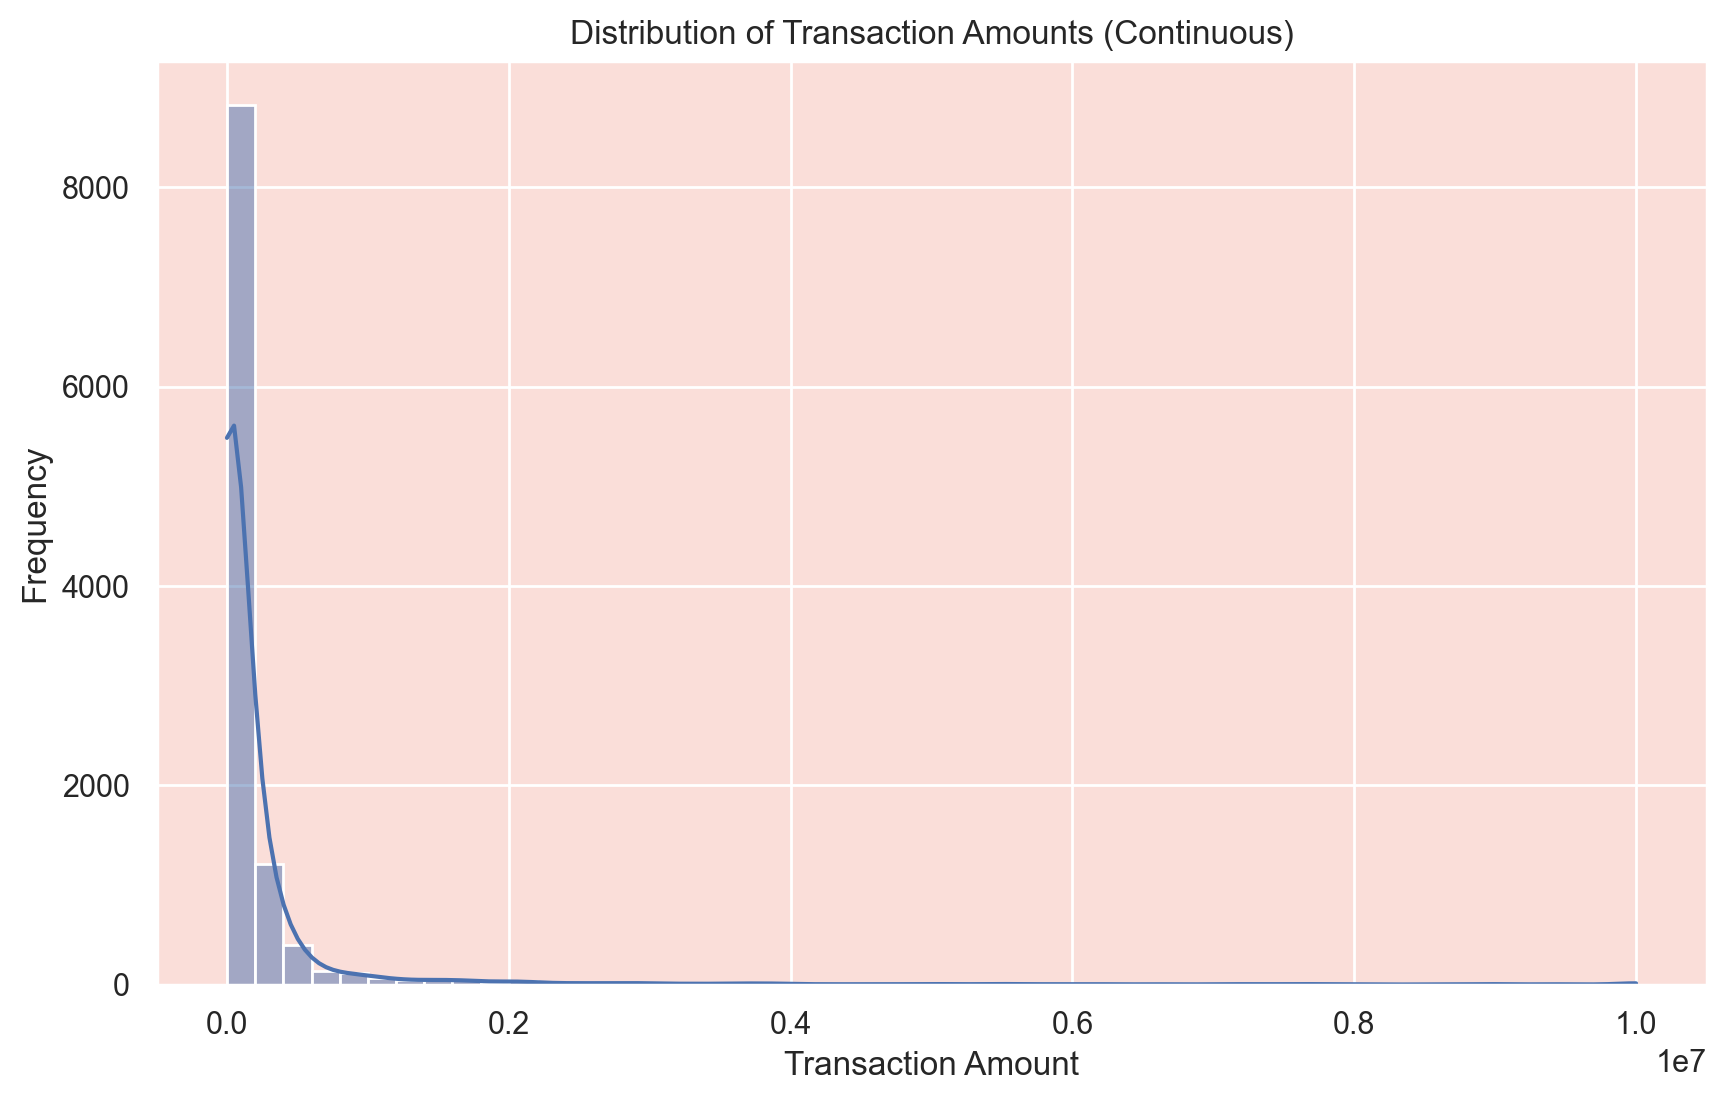

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], kde=True, bins=50)
plt.title('Distribution of Transaction Amounts (Continuous)')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">
This graph shows a left-skewed distribution of transaction amounts, indicating that most transactions are small, with only a few large transactions. The high frequency of low-value transactions is typical in financial datasets.


# 2.  Transaction amount VS Density


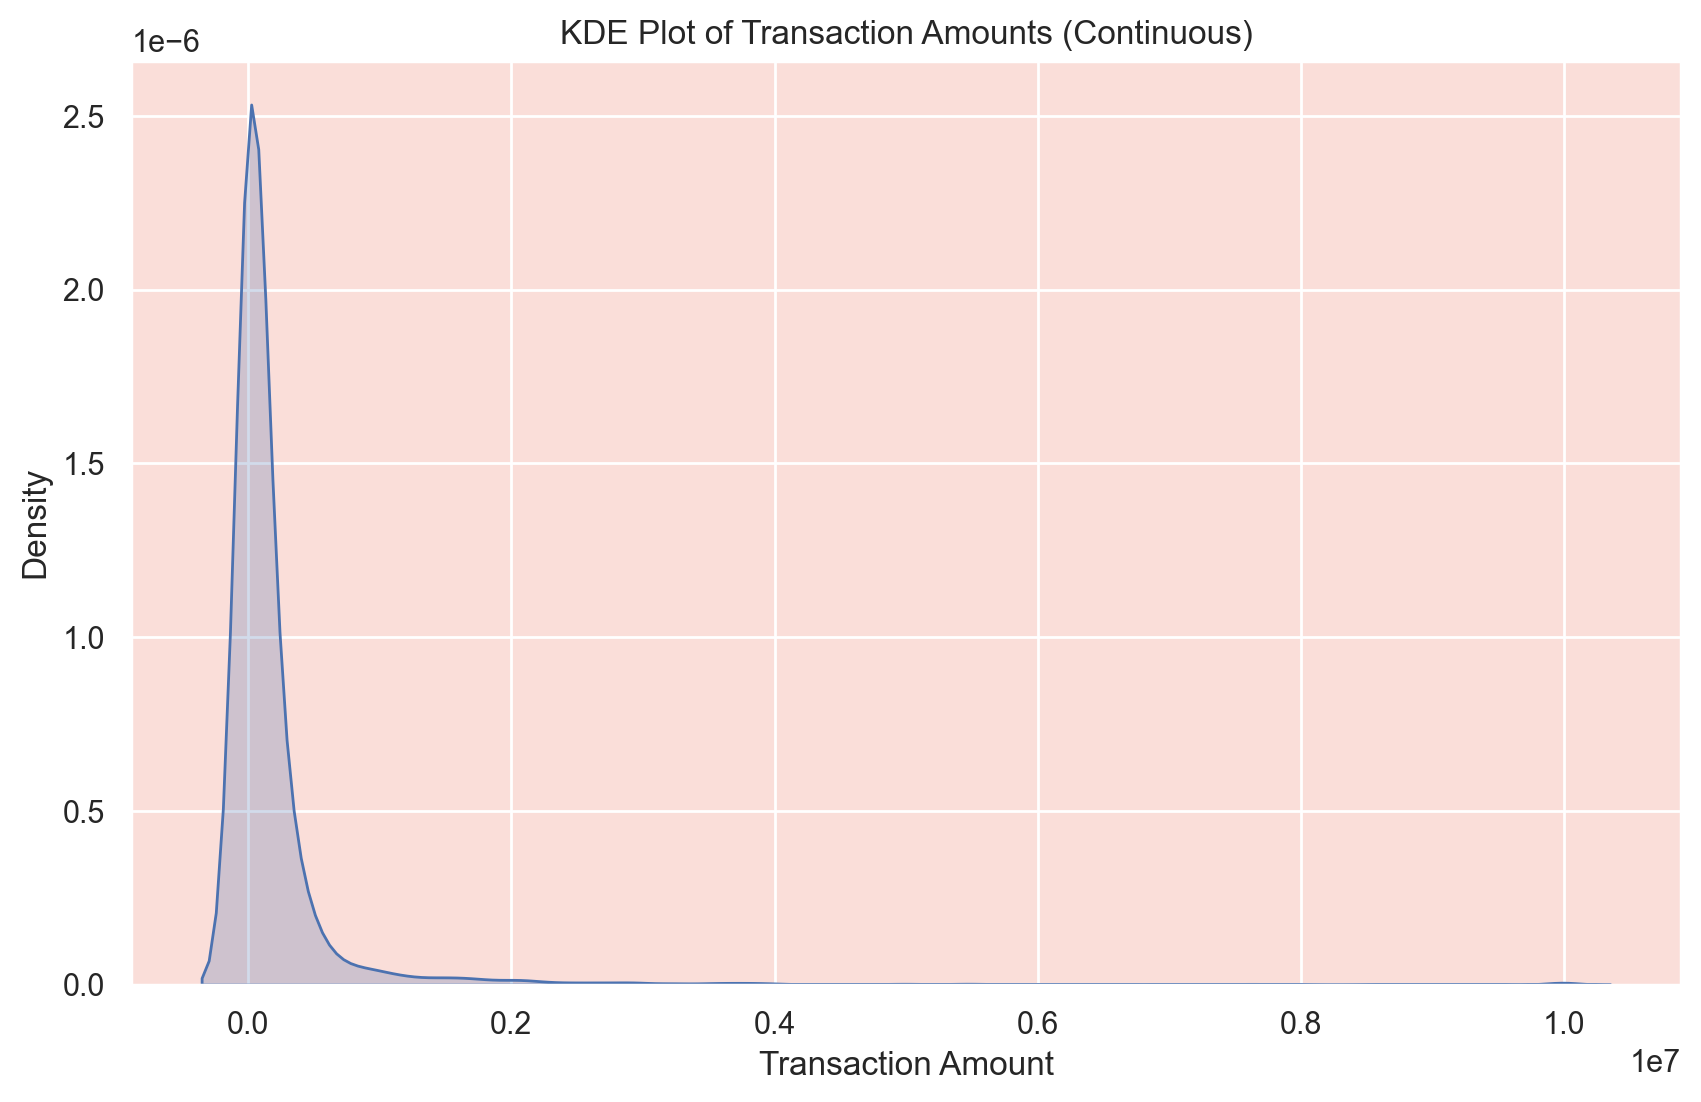

In [9]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['amount'], shade=True)
plt.title('KDE Plot of Transaction Amounts (Continuous)')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">
The KDE plot shows that most transactions are small, with a peak near zero indicating a high concentration of low-value transactions. The density quickly decreases as transaction amounts increase, highlighting the skewed distribution where smaller amounts are much more common than larger ones.


# Boxplot of Transaction Amount

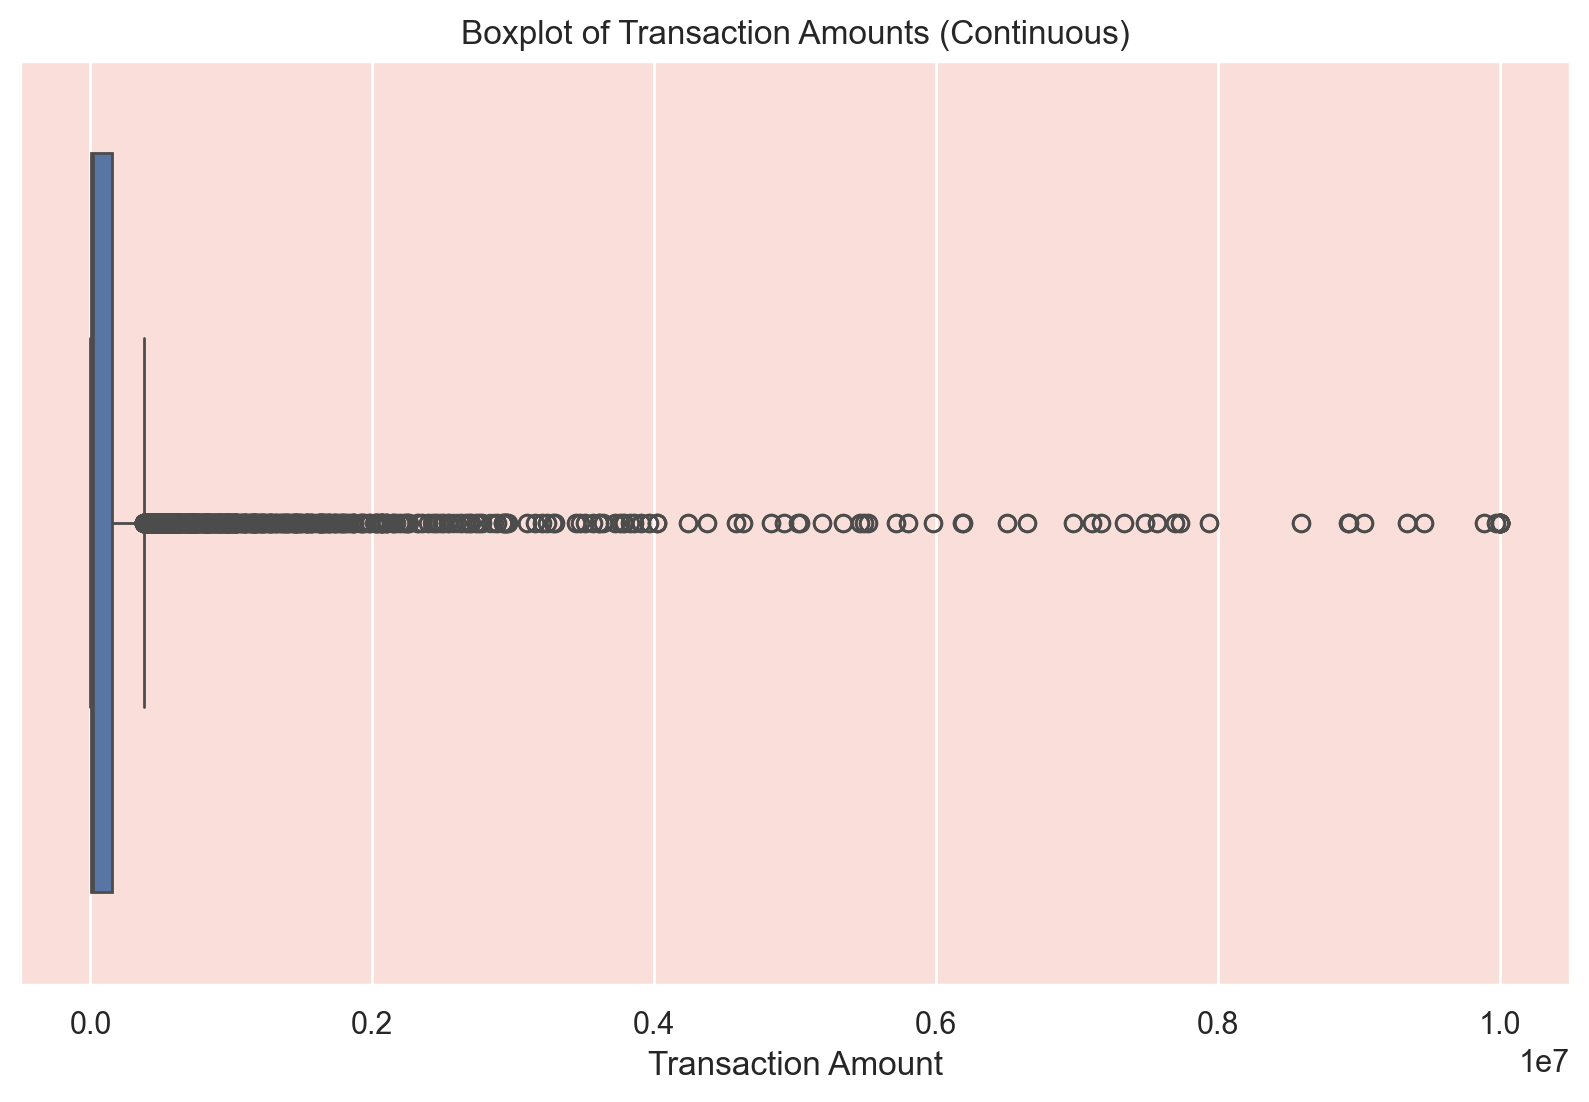

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='amount', data=df)
plt.title('Boxplot of Transaction Amounts (Continuous)')
plt.xlabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">
This boxplot visualizes the distribution of transaction amounts. The bulk of transactions are clustered at the lower end, close to zero, with many outliers extending towards higher amounts. The box is very narrow, indicating that most of the data points are concentrated near the lower values, while the whiskers and numerous outliers represent transactions that are significantly higher.

<a id="cat_uni"></a>
### <b><span style='color:#ff826e'>Step 4.1.2 |</span><span style='color:brown'> Categorical Variables Univariate Analysis</span></b>  

# 1. Transaction Type VS Count

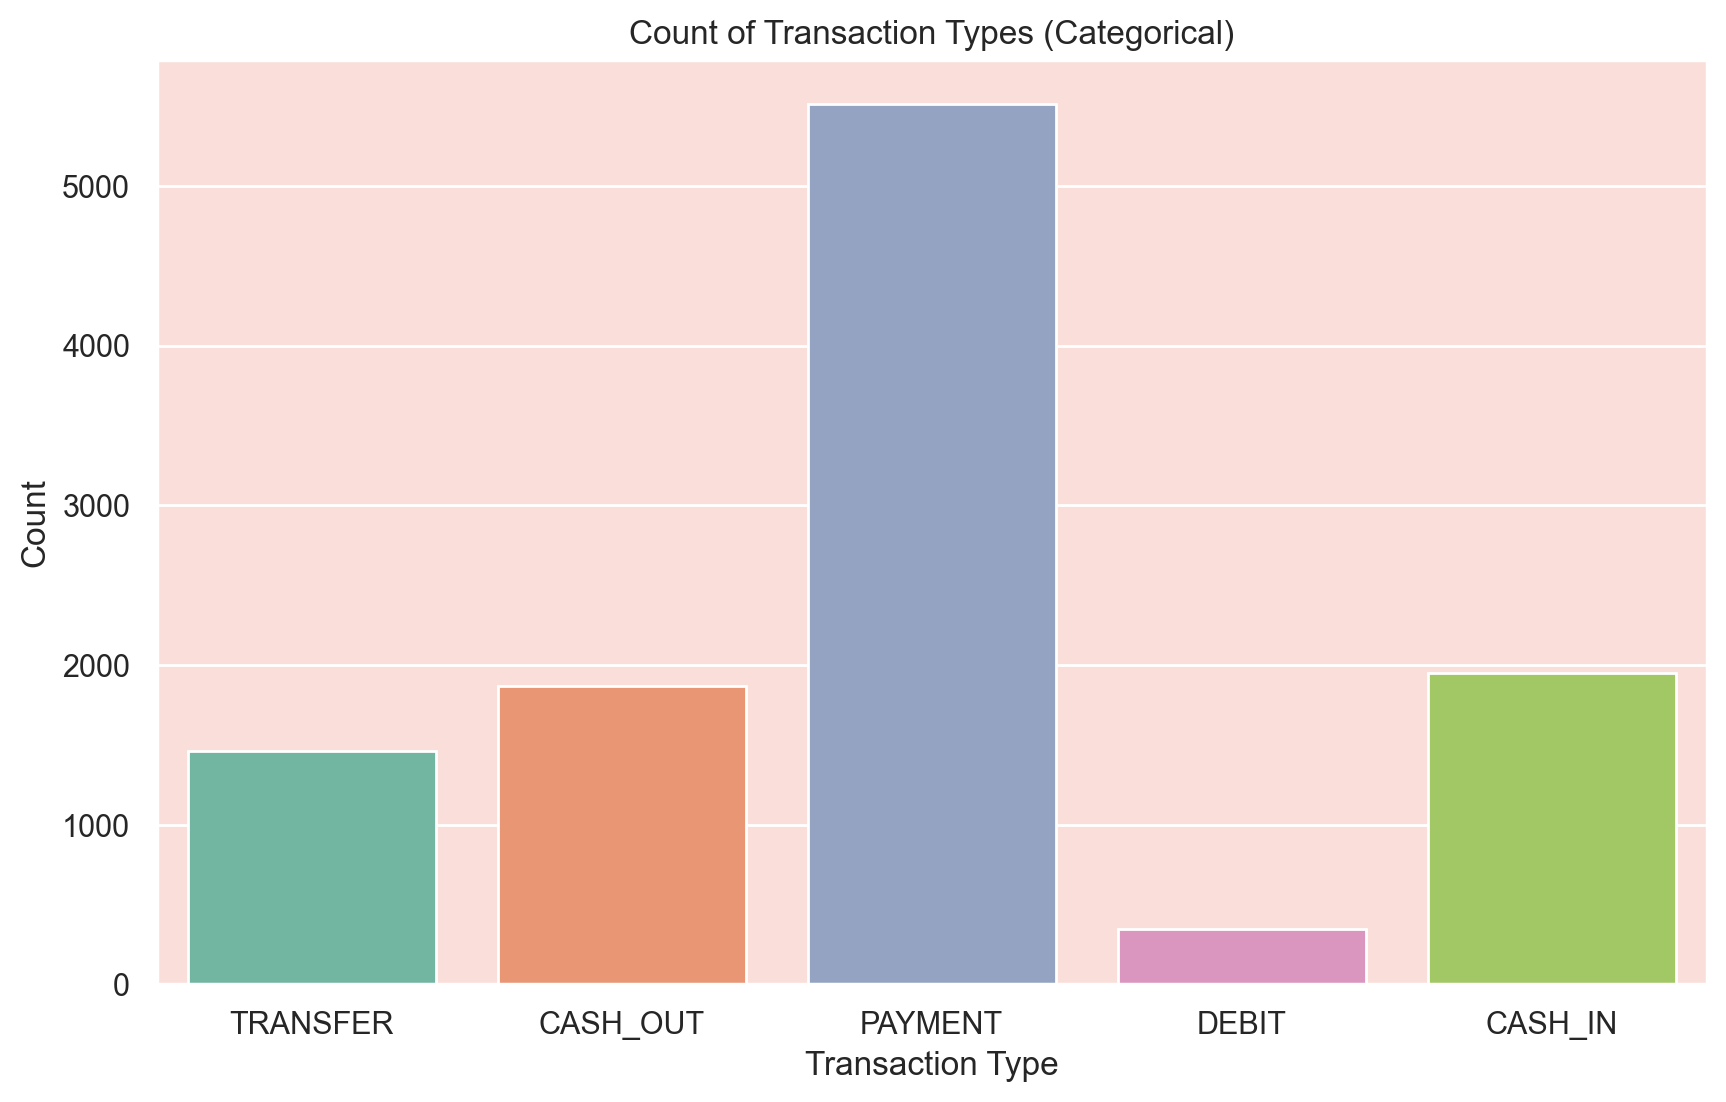

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Count of Transaction Types (Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">
This boxplot visualizes the distribution of transaction amounts. The bulk of transactions are clustered at the lower end, close to zero, with many outliers extending towards higher amounts. The box is very narrow, indicating that most of the data points are concentrated near the lower values, while the whiskers and numerous outliers represent transactions that are significantly higher.

# 2. Proportion of Fraudulent VS Non-Fraudulent Transactions

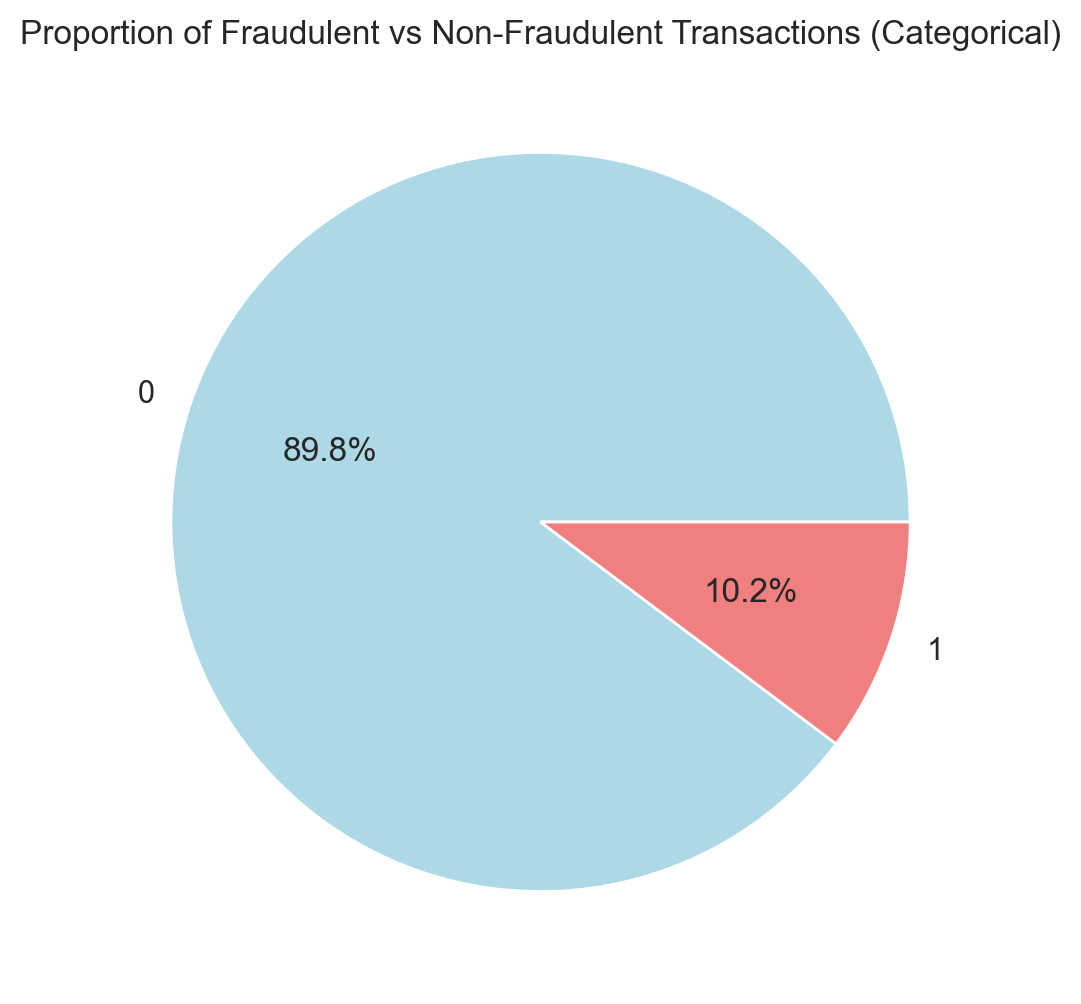

In [12]:
plt.figure(figsize=(10, 6))
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title('Proportion of Fraudulent vs Non-Fraudulent Transactions (Categorical)')
plt.ylabel('')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">
Proportion of Fraudulent vs Non-Fraudulent Transactions 

**Description: _** This pie chart represents the proportion of fraudulent (labeled "1") versus non-fraudulent (labeled "0") transactions.

**Insight: _**

The majority of transactions (89.8%) are non-fraudulent.

A smaller portion (10.2%) of the transactions are fraudulent

____
<a id="bivariate"></a>
# <b><span style='color:#ff826e'>Step 4.2 |</span><span style='color:brown'> Bivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
I am going to visualize using three types of charts: 

* __Continuous vs Continuous__: Scatter and hexbin plots explore the relationship between two continuous variables.

* __Continuous vs Categorical__: Boxplots and violin plots compare continuous data across categorical groups.

* __Categorical vs Categorical__: Stacked bar plots and mosaic plots compare categories.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

Explanation of Each Plot

* __Correlation Heatmap__: Understand the correlation between numerical variables.

* __Scatter Plot__: Visualize the relationship between transaction amount and original balance with fraud status highlighted.

* __Boxplot__: Compare the distribution of transaction amounts across different transaction types

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.1 |</span><span style='color:brown'> Continuous vs Continuous</span></b>  

# 1. Scatter Plot of Transaction Amount VS Original Balance

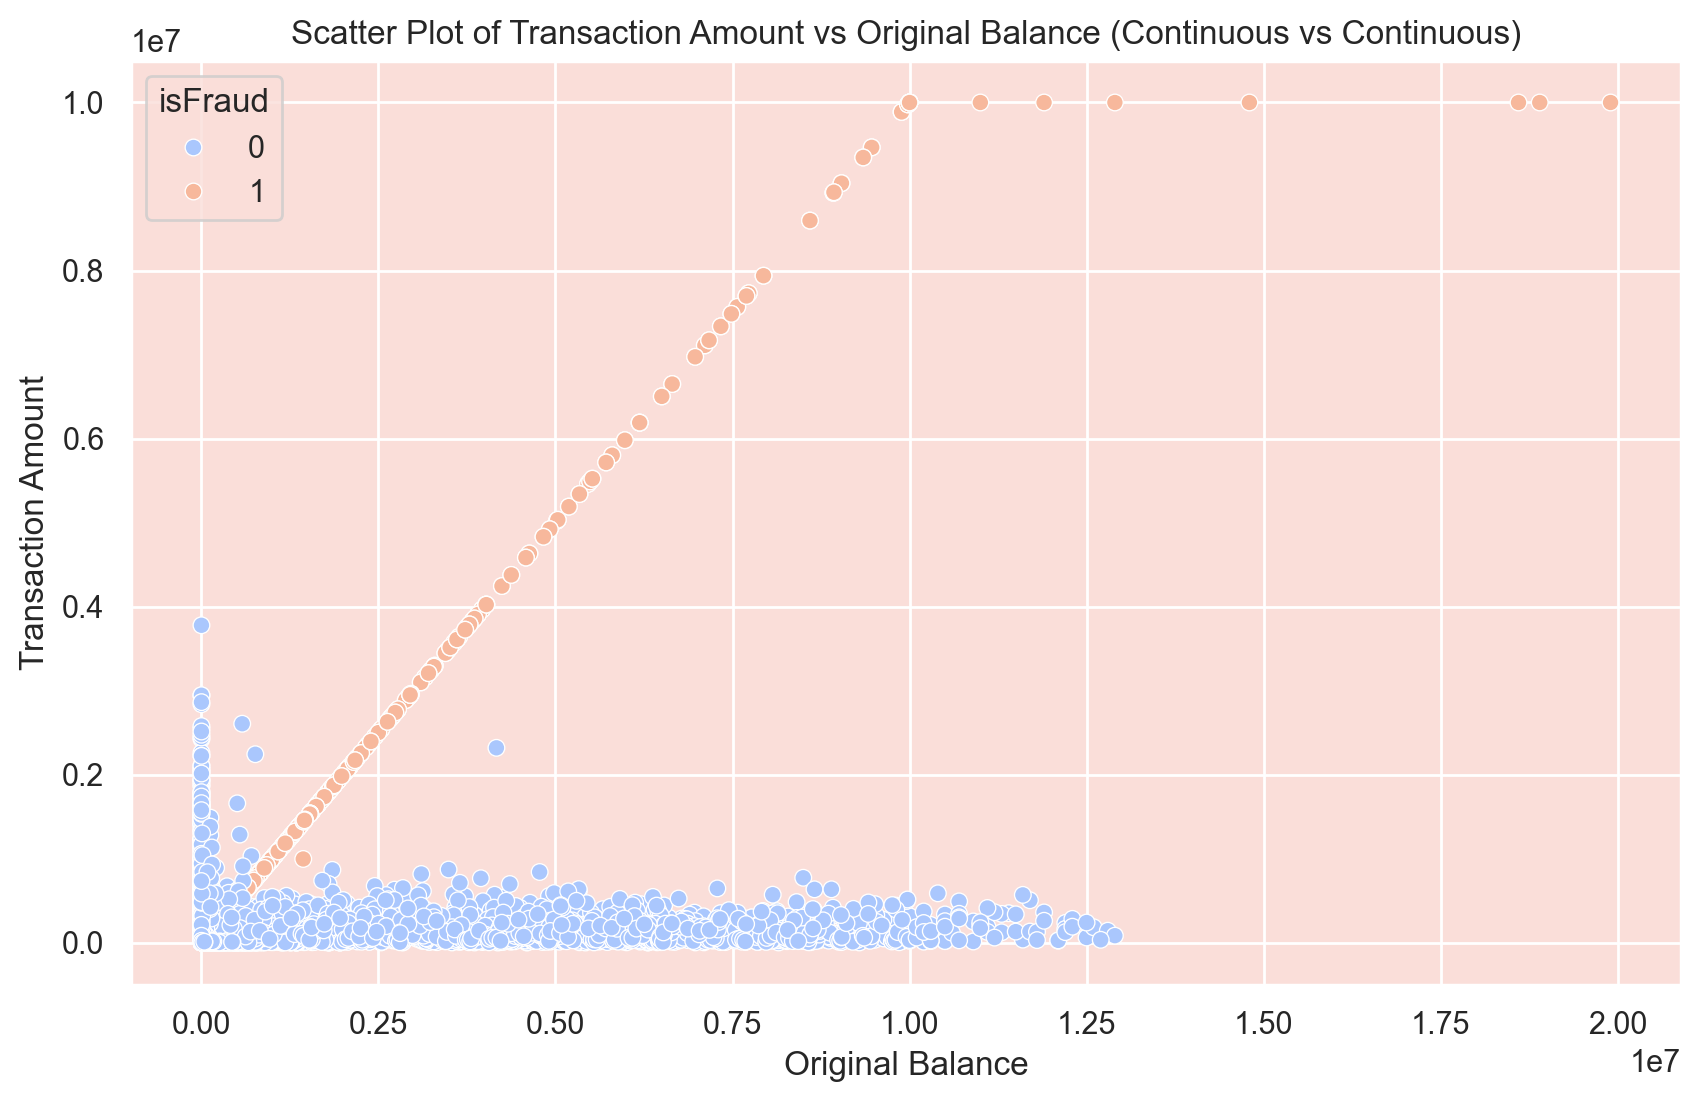

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldbalanceOrg', y='amount', data=df, hue='isFraud', palette='coolwarm')
plt.title('Scatter Plot of Transaction Amount vs Original Balance (Continuous vs Continuous)')
plt.xlabel('Original Balance')
plt.ylabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">
The scatter plot shows the relationship between the original balance and transaction amount, with blue points representing non-fraudulent transactions clustered at lower amounts and balances. Orange points, representing fraudulent transactions, mostly align along a diagonal where the transaction amount equals the original balance, indicating that fraud often involves transferring nearly the entire balance.

# 2. Hexbin Plot of Transaction Amount vs Original Balance 

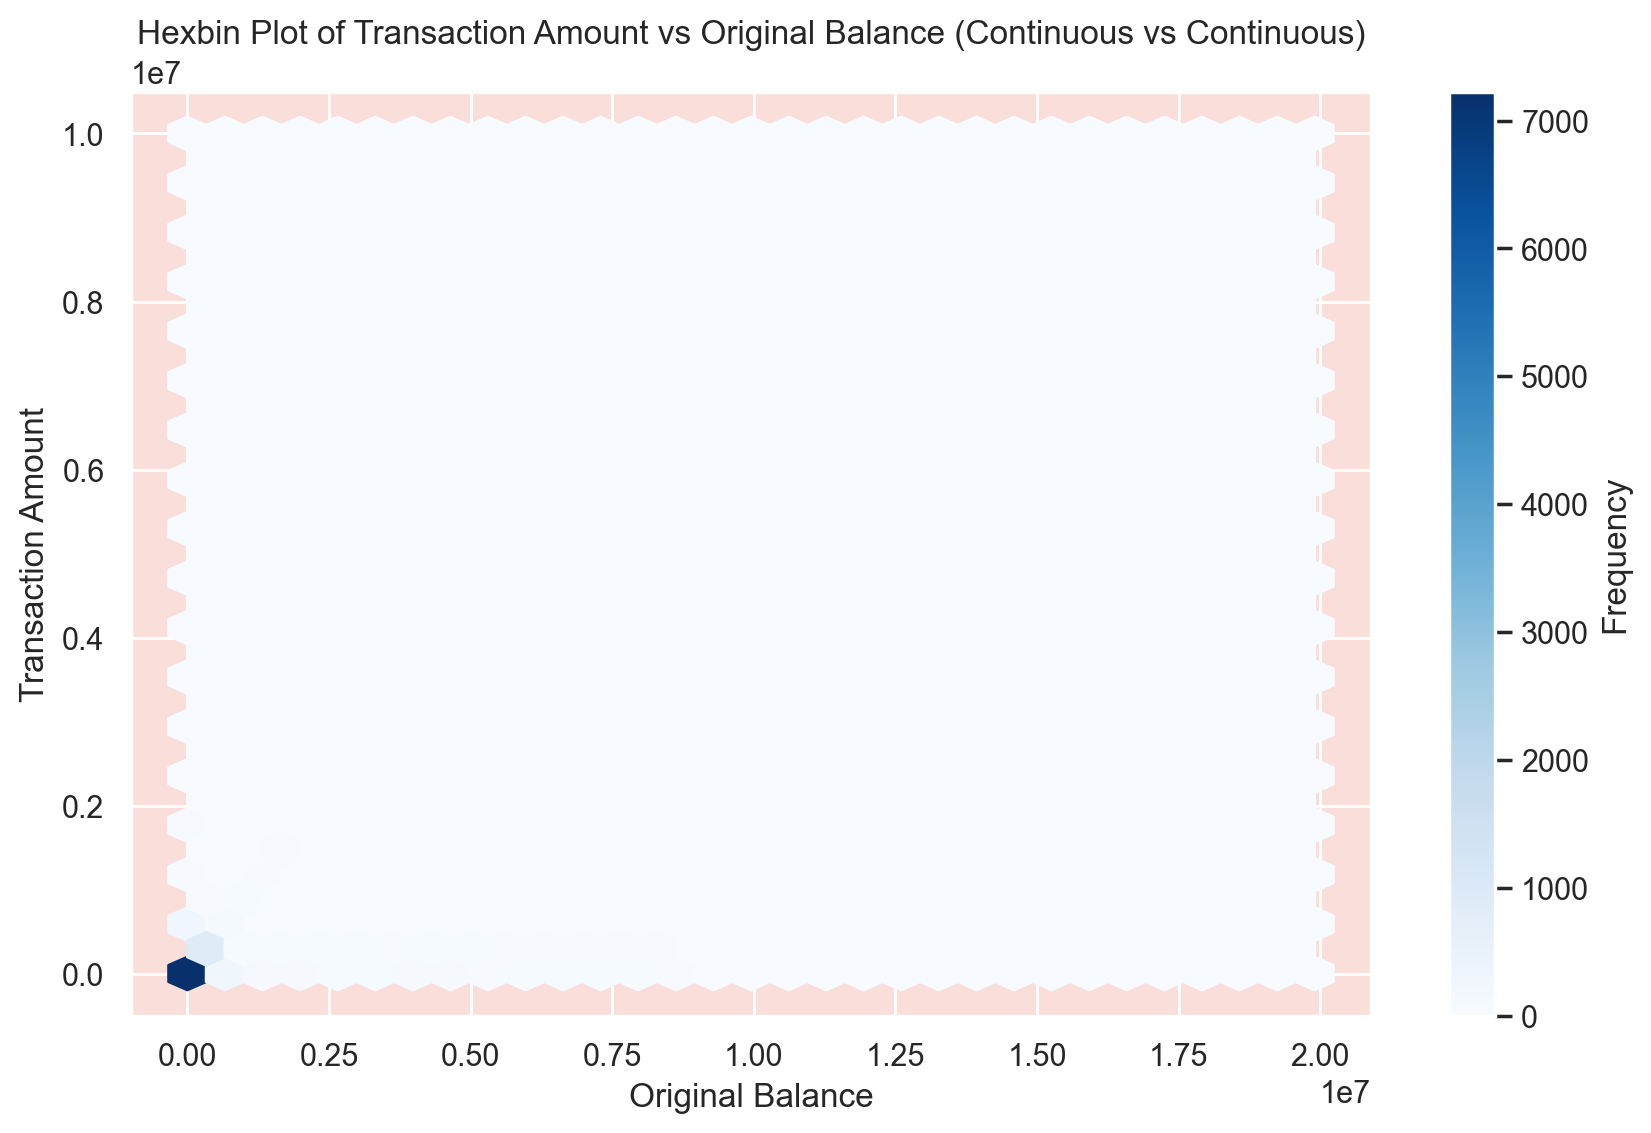

In [14]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['oldbalanceOrg'], df['amount'], gridsize=30, cmap='Blues')
plt.colorbar(label='Frequency')
plt.title('Hexbin Plot of Transaction Amount vs Original Balance (Continuous vs Continuous)')
plt.xlabel('Original Balance')
plt.ylabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

This graph is a Hexbin Plot showing the relationship between __Transaction Amount__ and __Original Balance.__

* __Hexbin Plot__: It uses hexagonal bins to visualize the concentration of data points. The darker the hexagon, the more data points are concentrated in that area.

* __Interpretation__: Most of the transactions seem to occur when both the transaction amount and the original balance are very low (near the bottom-left corner). The dark blue hexagons indicate higher frequency in that area.

This graph is useful for understanding where most transactions fall in terms of these two variables.

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.2 |</span><span style='color:brown'> Continuous  vs Categorical</span></b>  

# 1. Boxplot of Transaction Amount by Transaction Type

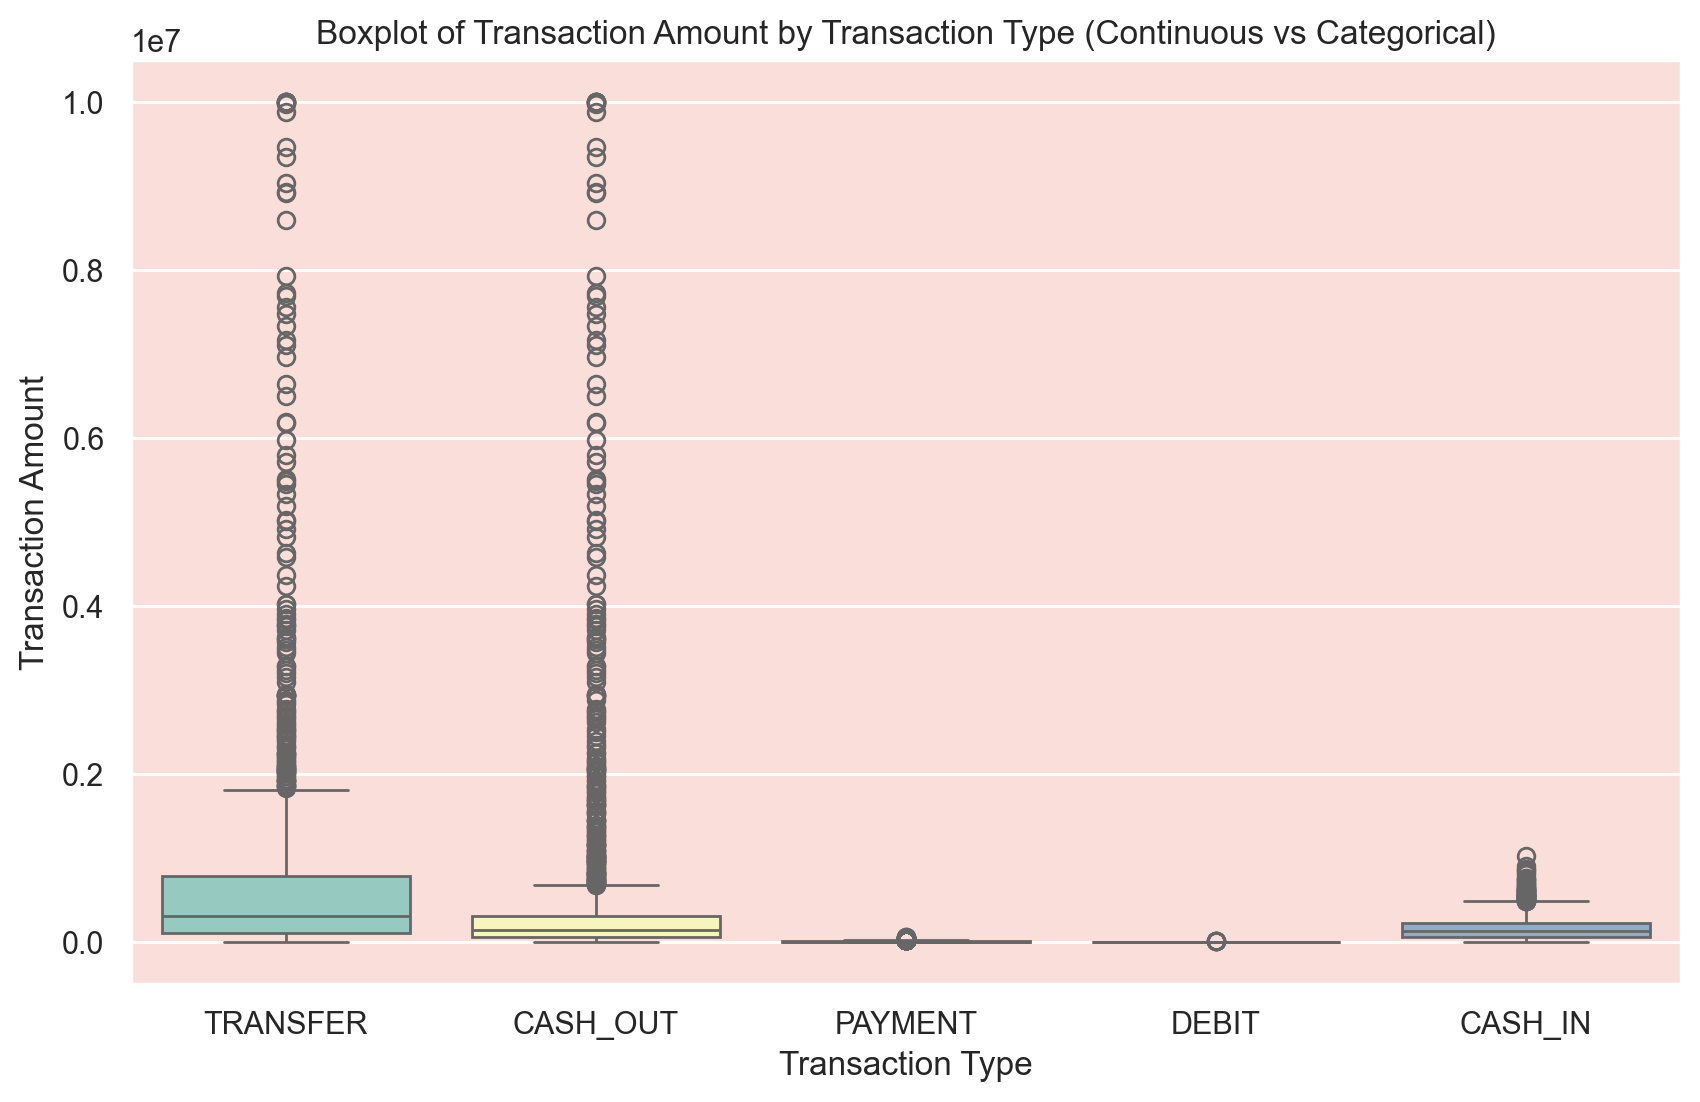

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', data=df, palette='Set3')
plt.title('Boxplot of Transaction Amount by Transaction Type (Continuous vs Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

This is a Boxplot showing the __Transaction Amount__ for different __Transaction Types.__

* __Boxplot__: It shows the distribution of transaction amounts for each type of transaction (e.g., TRANSFER, CASH_OUT).

* __Key Points__:

   The boxes represent the middle 50% of the data (from the 25th to the 75th percentile).

   The line inside the box is the median (middle value).

   Circles above or below represent outliers—values significantly higher or lower than most others.

* __Interpretation__:

    TRANSFER and CASH_OUT have larger transaction amounts, with several outliers.

    PAYMENT, DEBIT, and CASH_IN generally have smaller transaction amounts with fewer outliers.

    This plot helps to compare the transaction amounts across different types of transactions.

# 2. Violin Plot of Transaction Amount by Transaction Type

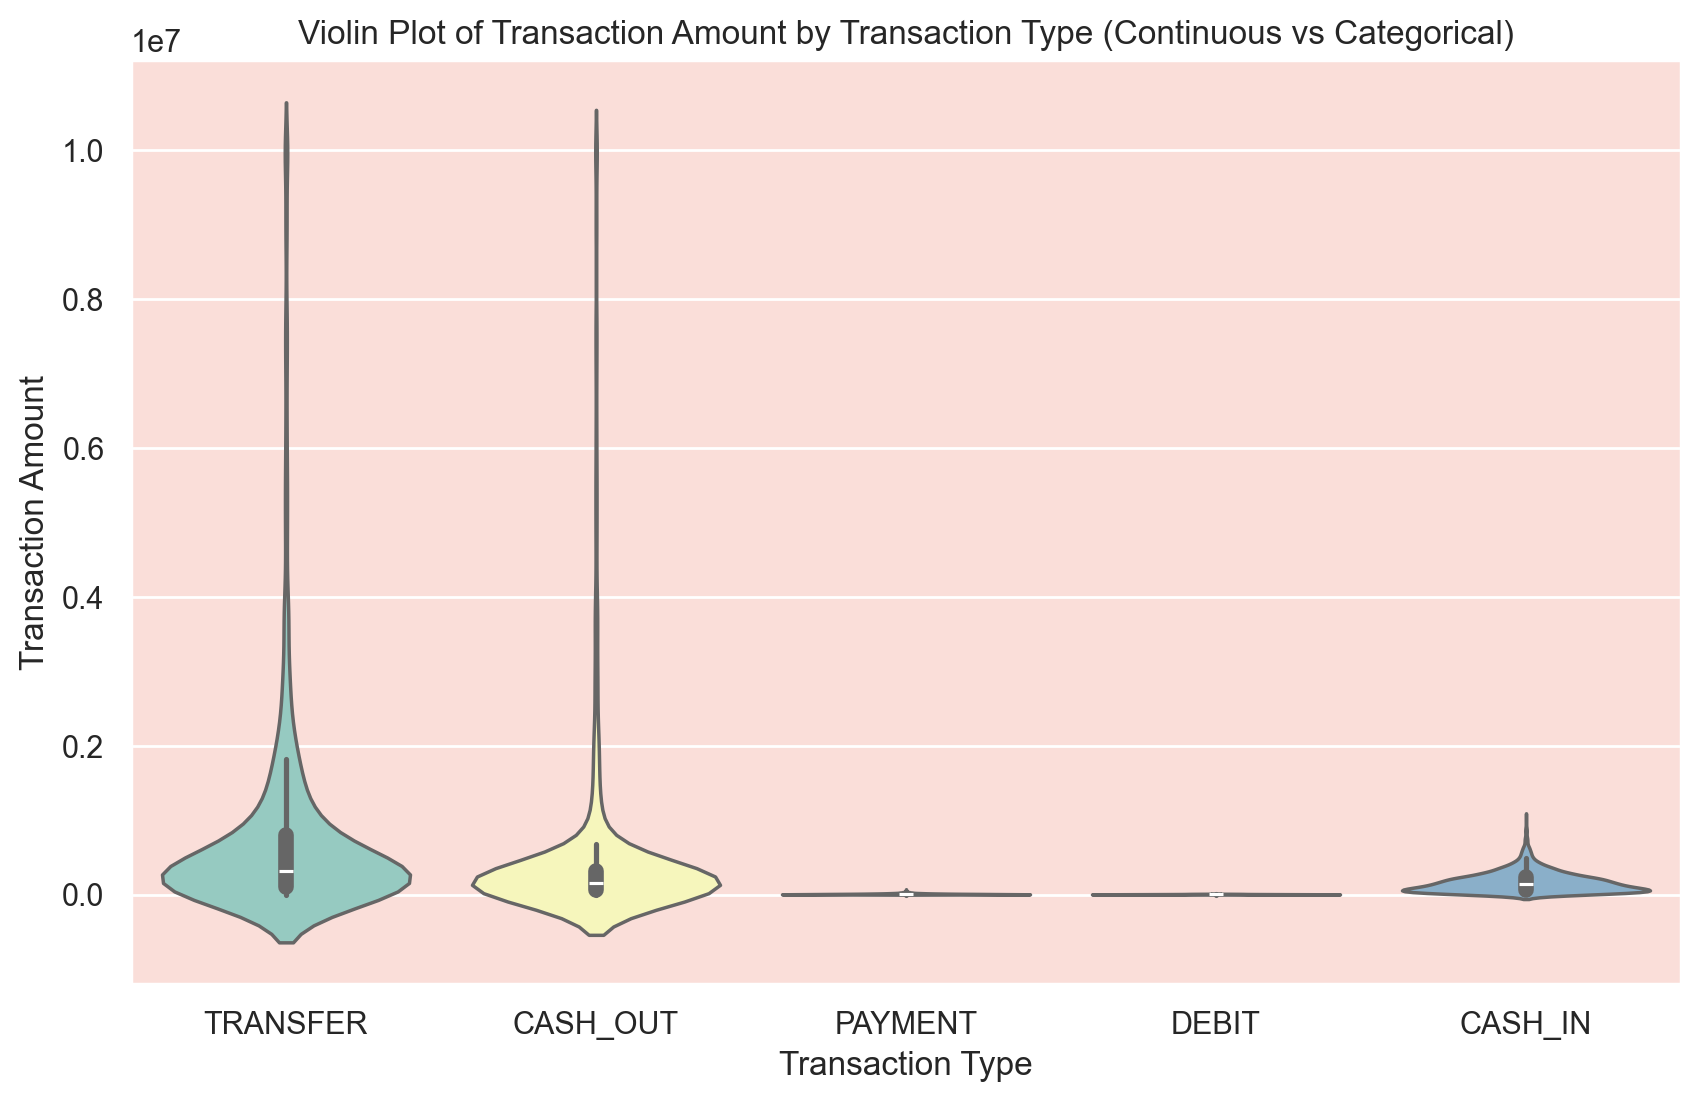

In [16]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='type', y='amount', data=df, palette='Set3')
plt.title('Violin Plot of Transaction Amount by Transaction Type (Continuous vs Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

This violin plot shows the distribution of transaction amounts across different transaction types. __TRANSFER__  and __CASH_OUT__ have the widest range, with most transactions being small but some very large ones. __PAYMENT__ and __DEBIT__ transactions are consistently small with little variation. __CASH_IN__ transactions are generally small but occasionally larger. TRANSFER and CASH_OUT are the most frequent and variable transaction types.

<a id="cat_target"></a>
### <b><span style='color:#ff826e'>Step 4.2.3 |</span><span style='color:brown'>  Categorical vs Categorical</span></b>  

# 1. Stacked Bar Plot of Transaction Type by Fraud Status

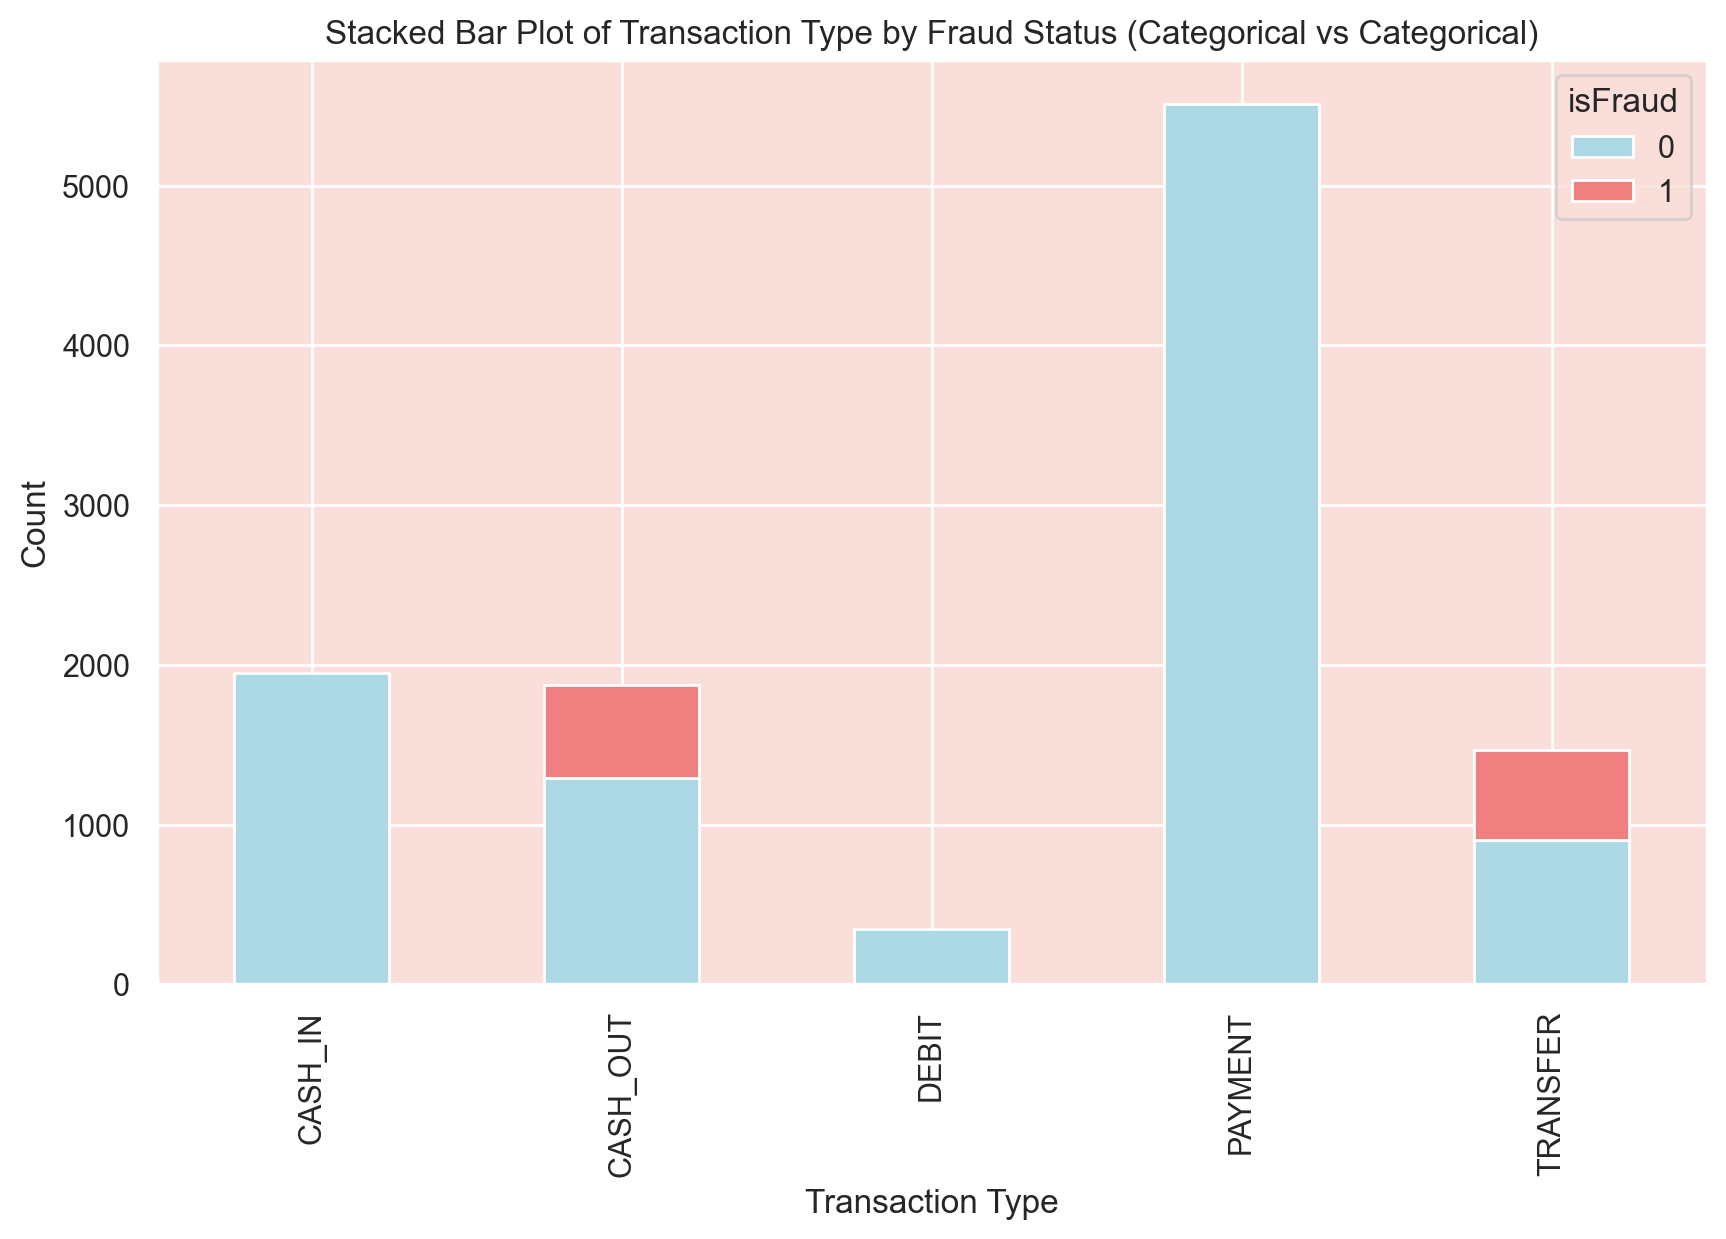

In [17]:
pd.crosstab(df['type'], df['isFraud']).plot(kind='bar', stacked=True, color=['lightblue', 'lightcoral'], figsize=(10, 6))
plt.title('Stacked Bar Plot of Transaction Type by Fraud Status (Categorical vs Categorical)')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

The graph is a stacked bar plot showing the number of transactions by type __(CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER)__ and whether they were fraudulent (red) or not fraudulent (blue).

__CASH_OUT__ and __TRANSFER__ transactions have noticeable fraud, indicated by the red sections in their bars.

__PAYMENT__ transactions are the most common but have no fraud cases.

__CASH_IN__ and __DEBIT__ transactions have no fraud.

This suggests that fraud is more likely in __CASH_OUT__ and __TRANSFER__ transactions.


# 2. Mosaic Plot of Transaction Type by Fraud Status

<Figure size 2000x1200 with 0 Axes>

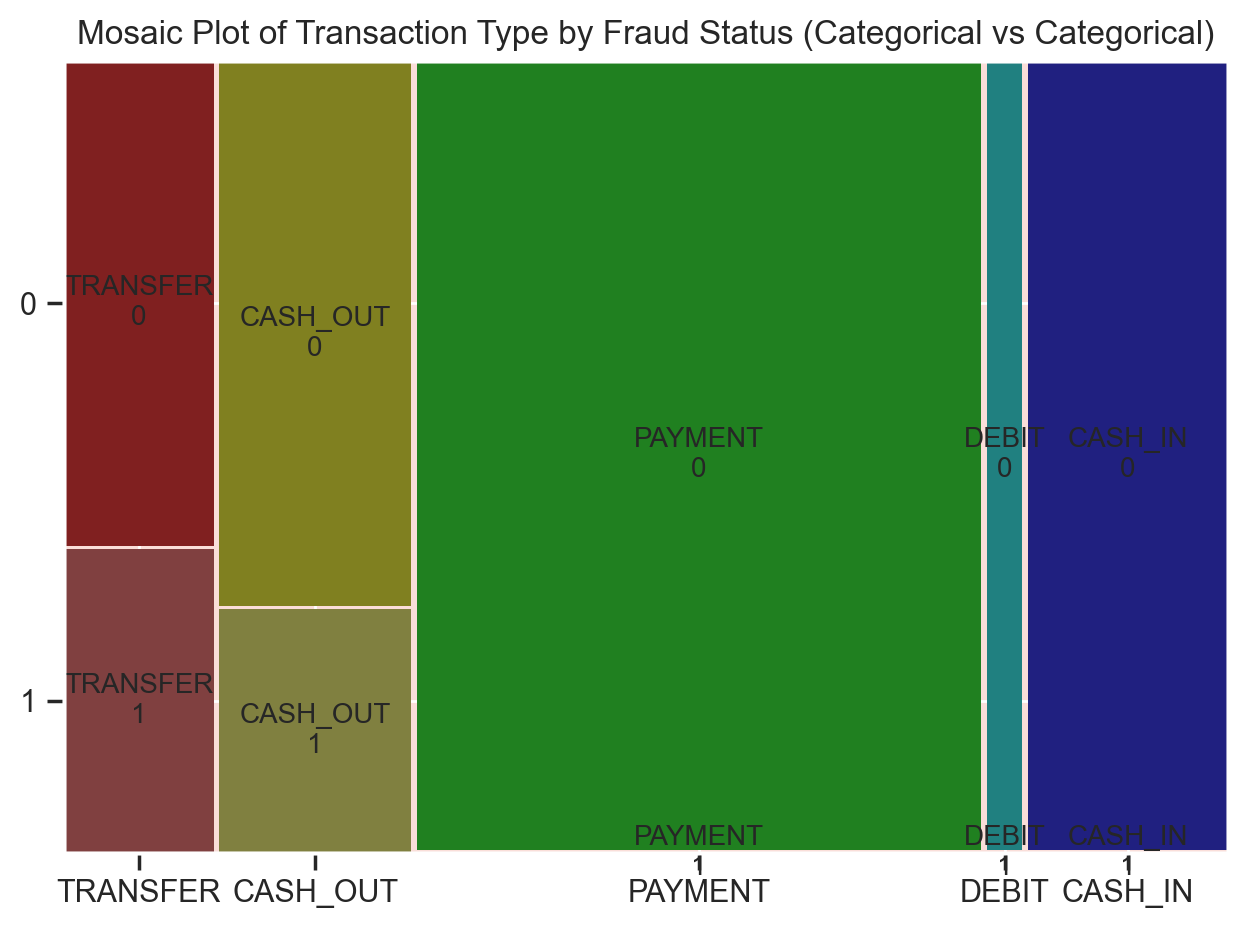

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(10, 6))
mosaic(df, ['type', 'isFraud'], title='Mosaic Plot of Transaction Type by Fraud Status (Categorical vs Categorical)')
plt.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

This mosaic plot shows the relationship between transaction types and fraud status. 

- **TRANSFER** and **CASH_OUT** transactions include both fraudulent and non-fraudulent cases, with a noticeable amount of fraud.
- **PAYMENT**, **DEBIT**, and **CASH_IN** transactions are mostly non-fraudulent, indicated by larger blocks in the non-fraud category.

The plot suggests that fraud is more common in **TRANSFER** and **CASH_OUT** transactions.

____
<a id="bivariate"></a>
# <b><span style='color:#ff826e'>Step 4.3 |</span><span style='color:brown'> Multivariate Analysis</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
I am going to visualize using three types of charts: 

* __Continuous Data__: Pair plots explore relationships among multiple continuous variables.

* __Categorical Data__: Grouped boxplots compare continuous data across multiple categorical groups.

* __Mixed Data__: Heatmaps, pair plots with hue, and FacetGrid visualize the interplay between continuous and categorical variables.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

 __Explanation of Each Plot__

* __Pair Plot__: Explore pairwise relationships between multiple variables with fraud status as a differentiator.

* __Heatmap__: Detailed correlation between all numerical variables.

* __Facet Grid__: Analyze how transaction amounts vary across transaction types and fraud status.

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.3.1 |</span><span style='color:brown'> Continuous Data</span></b>  

# Pair Plot of continuous features like amount , oldbalanceOrg, newbalanceOrig, isFraud

<Figure size 2000x1200 with 0 Axes>

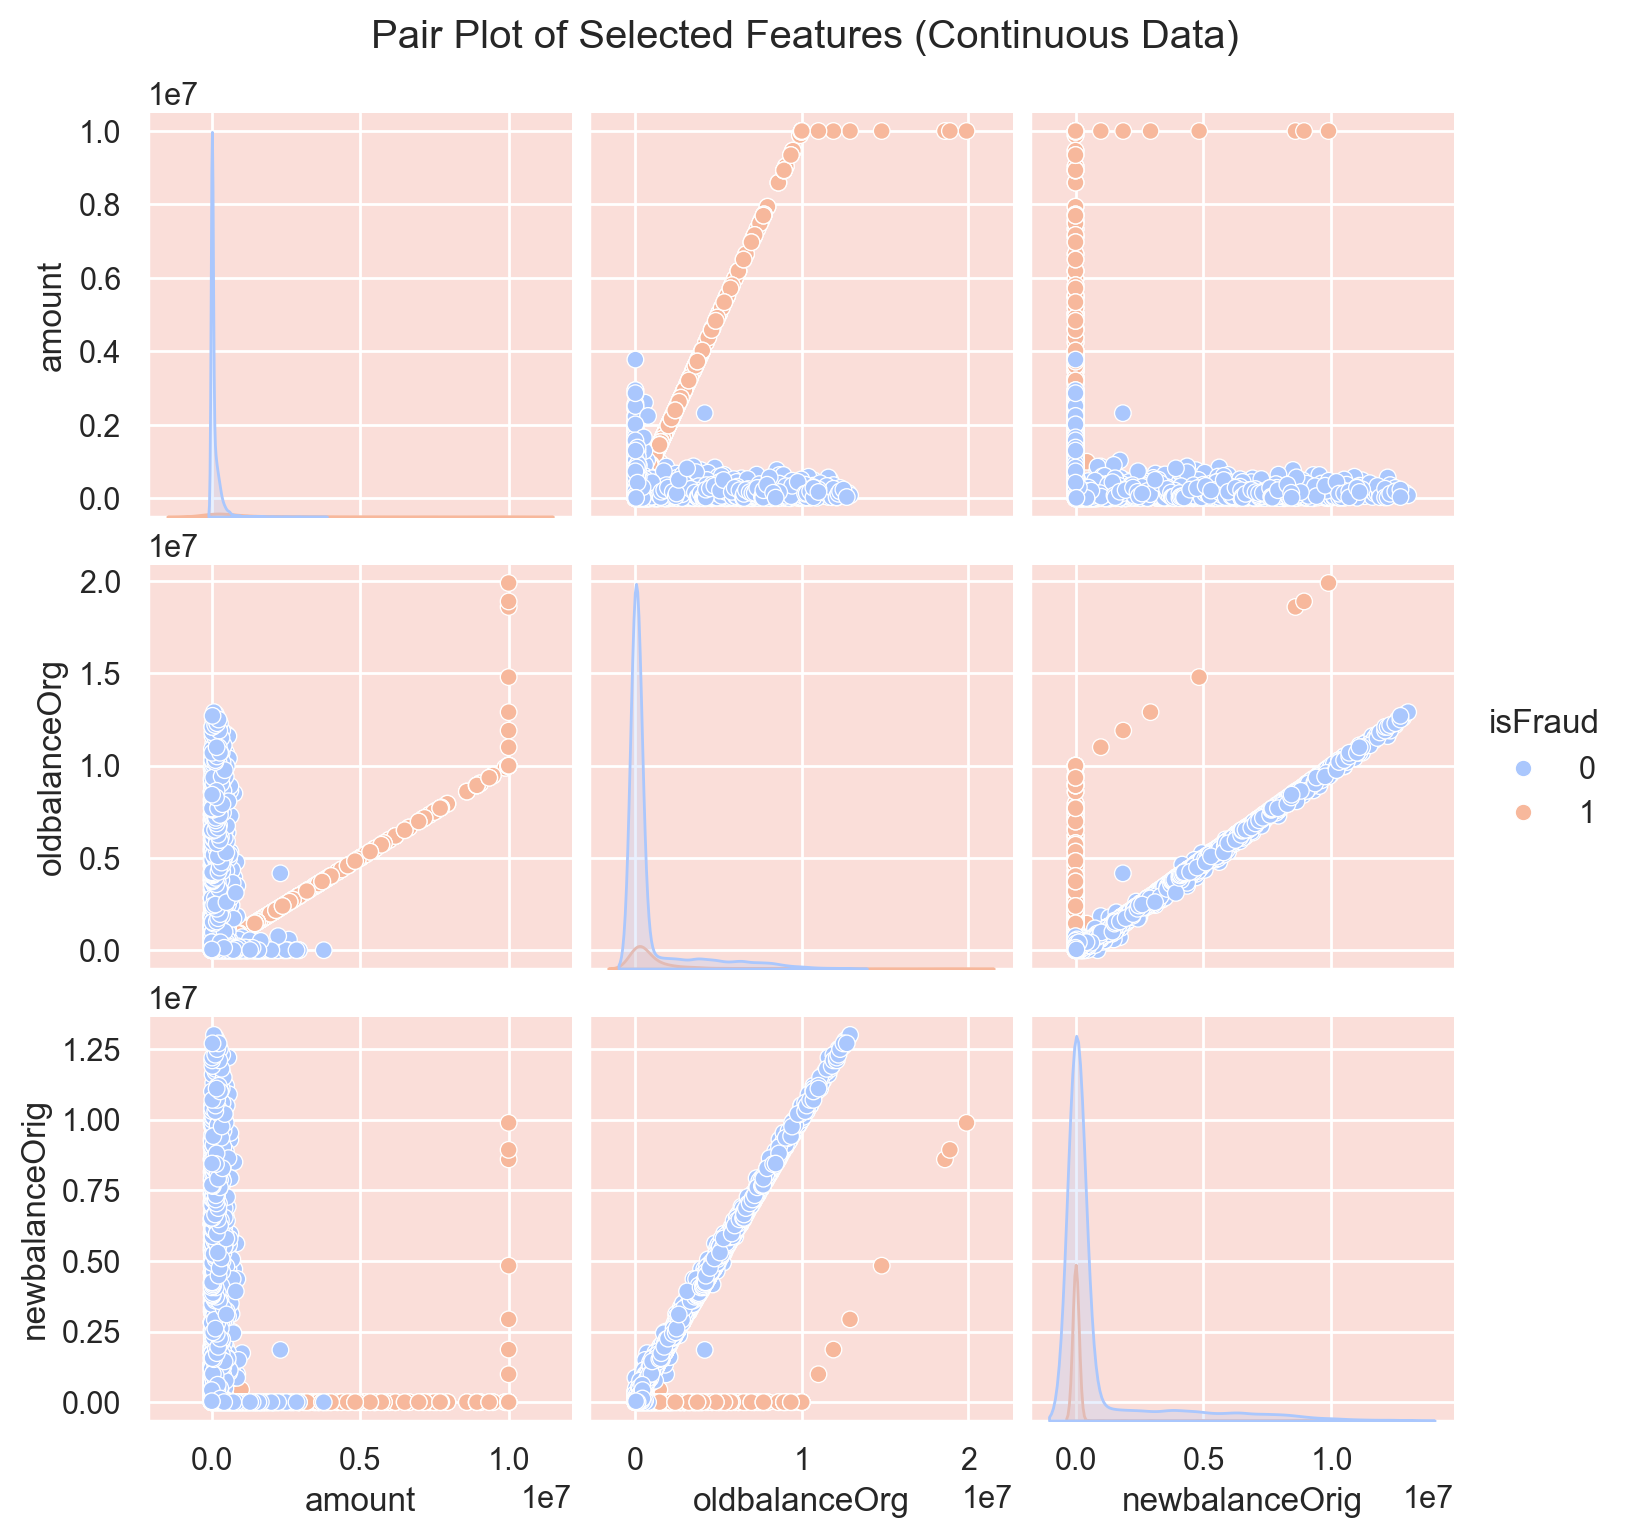

In [19]:
plt.figure(figsize=(10, 6))
sns.pairplot(df[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isFraud']], hue='isFraud', diag_kind='kde', palette='coolwarm')
plt.suptitle('Pair Plot of Selected Features (Continuous Data)', y=1.02)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

**Continuous Data: Pair Plot Explanation**

- **Purpose:** Visualizes relationships between continuous features (amount, oldbalanceOrg, newbalanceOrig) categorized by fraud status (isFraud = 1 or 0).

- **Diagonal Plots:** Display individual distributions of each feature.

- **Off-Diagonal Plots:** Show pairwise relationships between features.

**Key Insights:**
- Fraudulent transactions (orange dots) often exhibit distinct patterns, like higher balances or specific balance changes.
- Non-fraudulent transactions (blue dots) are more varied and typically have lower balances.

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.3.2 |</span><span style='color:brown'> Categorical Data</span></b>  

# Grouped Boxplot of Transaction Amount by Type and Fraud Status

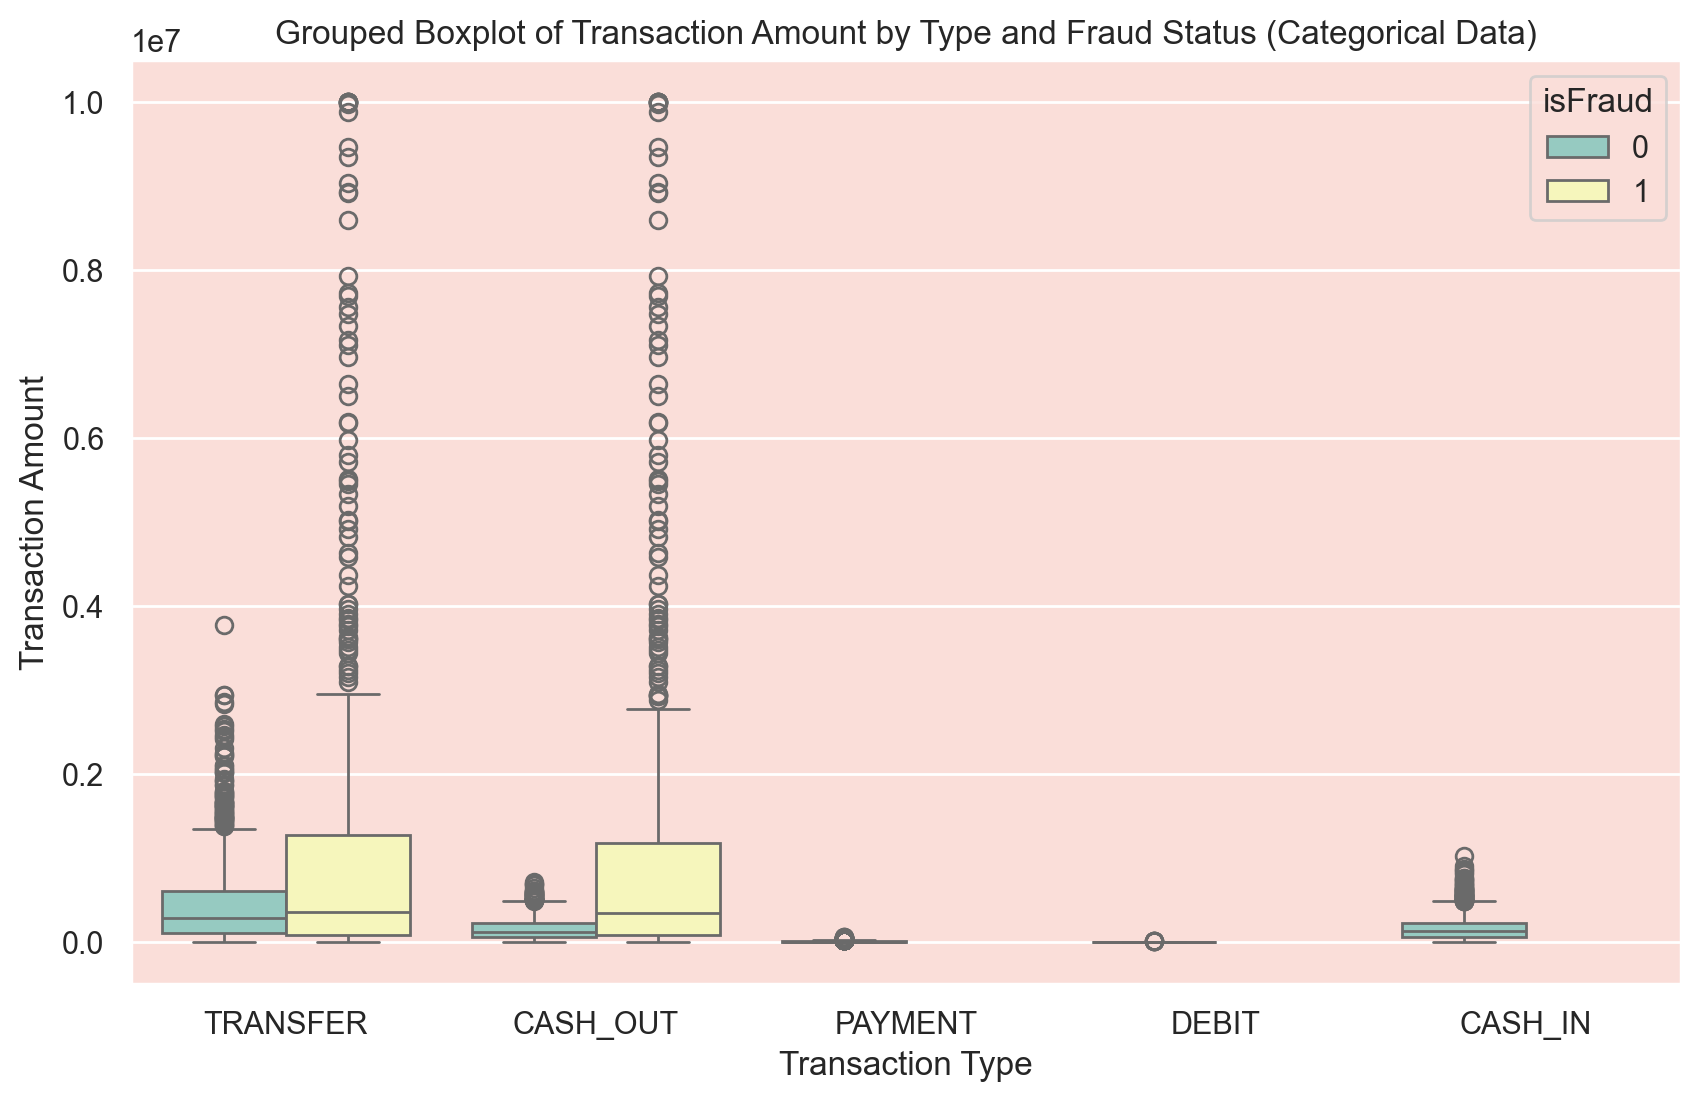

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df, palette='Set3')
plt.title('Grouped Boxplot of Transaction Amount by Type and Fraud Status (Categorical Data)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

This grouped boxplot shows the distribution of transaction amounts across different transaction types, categorized by fraud status (isFraud = 0 or 1).

- **TRANSFER** and **CASH_OUT** have a wider range of amounts, with both fraudulent (yellow) and non-fraudulent (green) transactions. Fraudulent transactions tend to have higher amounts.
- **PAYMENT**, **DEBIT**, and **CASH_IN** transactions are mostly non-fraudulent and have lower transaction amounts with less variation. 

This suggests that higher transaction amounts in TRANSFER and CASH_OUT types are more associated with fraud.

<a id="num_target"></a>
### <b><span style='color:#ff826e'>Step 4.3.3 |</span><span style='color:brown'> Mix Data</span></b>  

# 1. Heatmap of Correlations

In [21]:
continuous_features

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

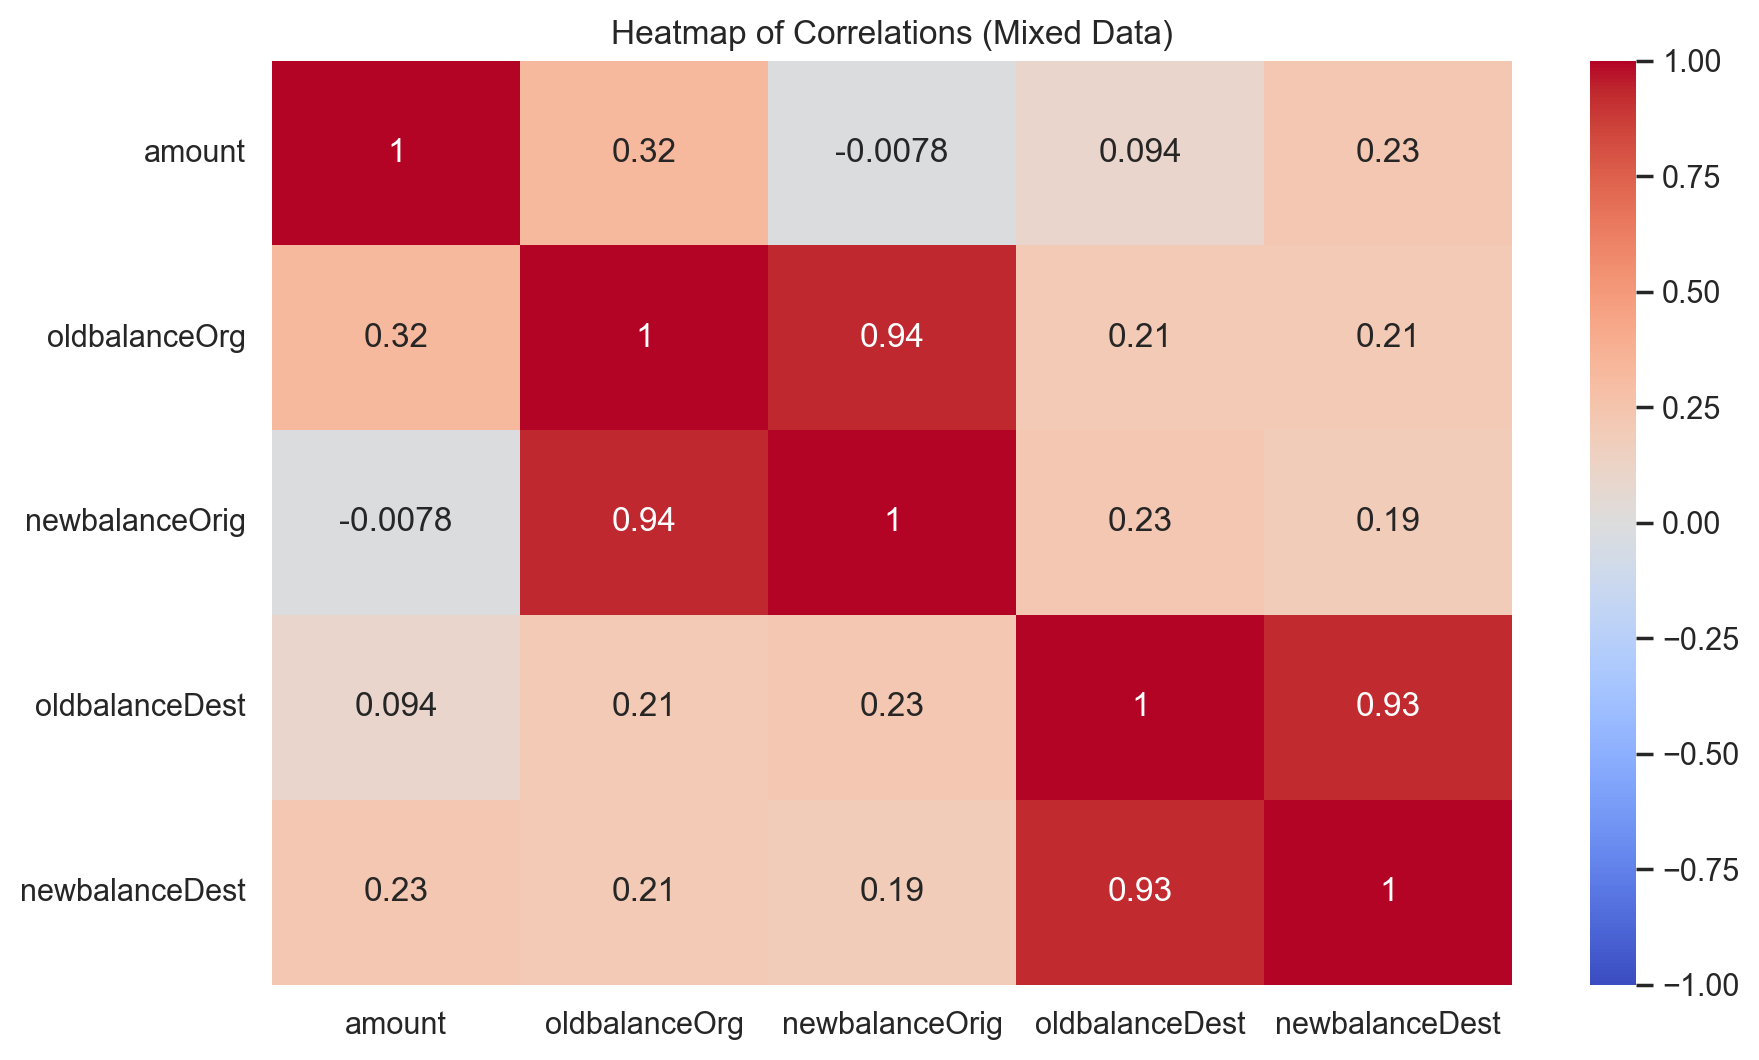

In [22]:
continuous_clm = df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
plt.figure(figsize=(10, 6))
corr = continuous_clm.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlations (Mixed Data)')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

__Purpose__: This heatmap shows the correlation between different numerical features in the dataset. Correlation values range from -1 to 1, where:

__1__ indicates a perfect __positive__ correlation.

__-1__ indicates a perfect __negative__ correlation.

__0__ indicates __no__ correlation.

# 2. Facet Grid of Transaction Amount by Type and Fraud Status

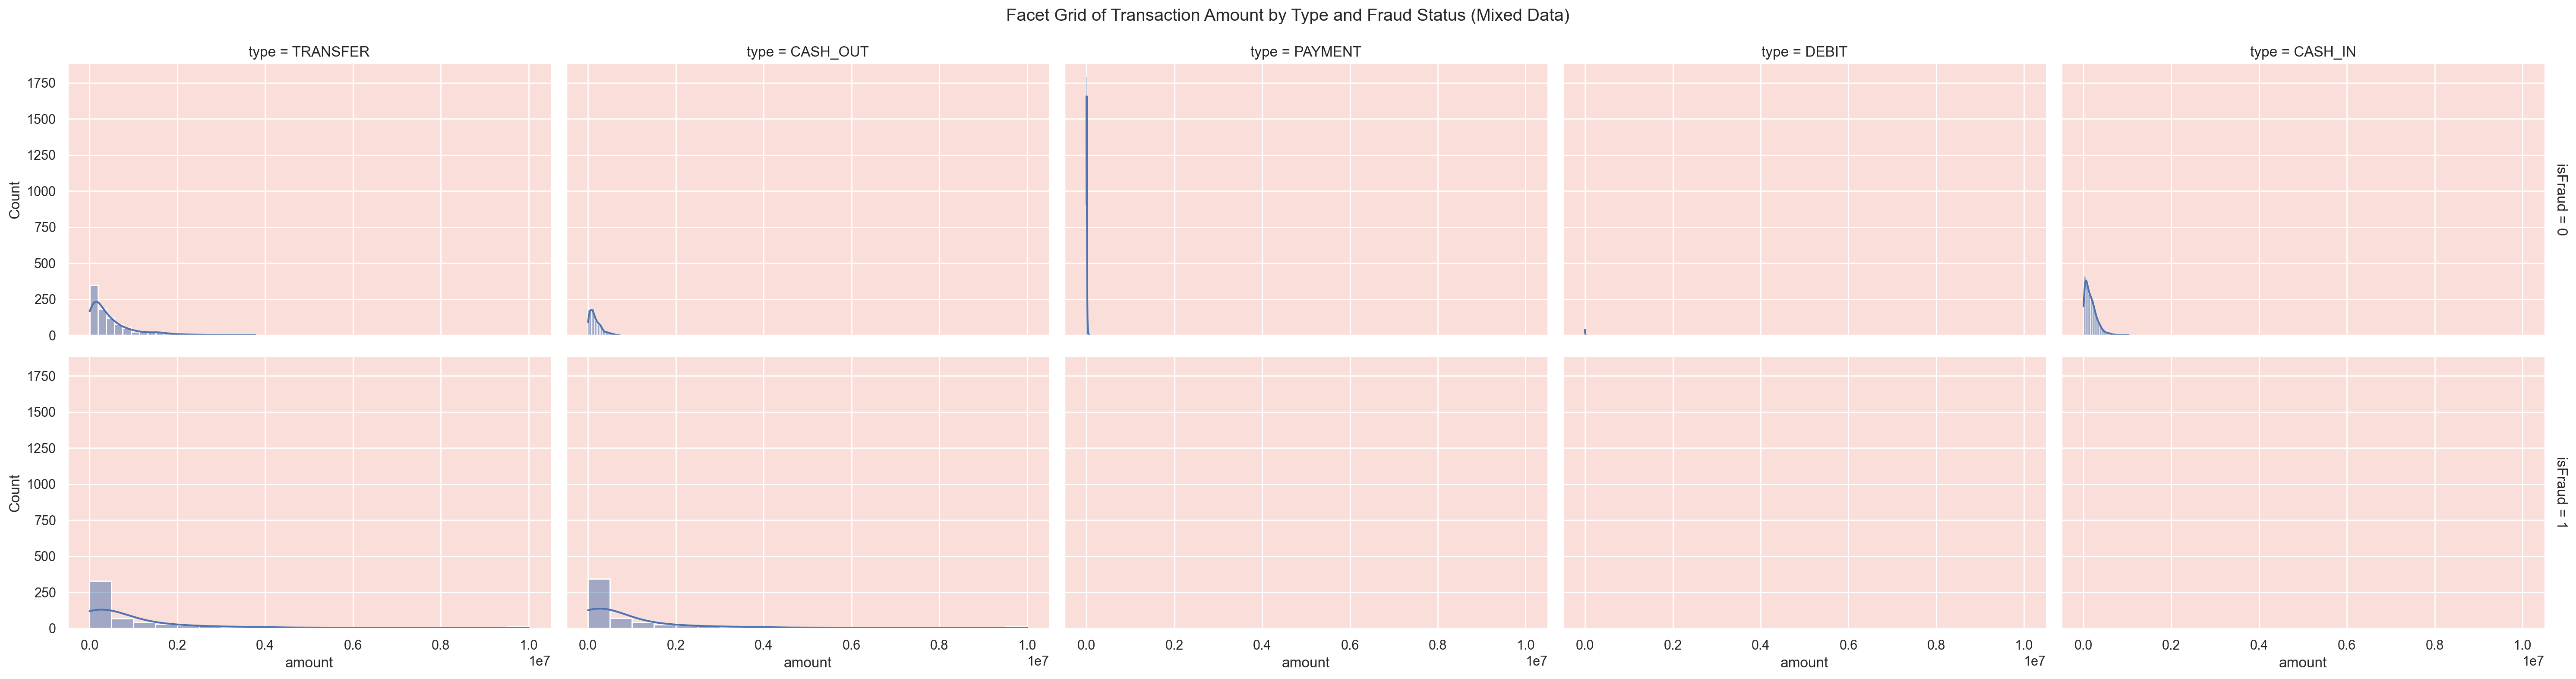

In [23]:
g = sns.FacetGrid(df, col='type', row='isFraud', margin_titles=True, height=4, aspect=1.5)
g.map(sns.histplot, 'amount', bins=20, kde=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid of Transaction Amount by Type and Fraud Status (Mixed Data)')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; font-size:115%;color:black; text-align:left">

This graph is a Facet Grid that shows the distribution of transaction amounts by different transaction types (TRANSFER, CASH_OUT, PAYMENT, DEBIT, and CASH_IN) and whether the transaction was fraudulent (isFraud = 1) or not (isFraud = 0).

<a id="preprocessing"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:#ff826e'>Step 5.1 |</span><span style='color:brown'> Irrelevant Features Removal </span></b>

### Here is 2 columns are Irrelevant so remove it

In [24]:
df = df.drop(['nameOrig','nameDest'],axis=1)

In [25]:
df

step      type     amount  oldbalanceOrg  newbalanceOrig  \
0         1  TRANSFER     181.00         181.00            0.00   
1         1  CASH_OUT     181.00         181.00            0.00   
2         1  TRANSFER    2806.00        2806.00            0.00   
3         1  CASH_OUT    2806.00        2806.00            0.00   
4         1  TRANSFER   20128.00       20128.00            0.00   
...     ...       ...        ...            ...             ...   
11137     7     DEBIT    6393.71      433084.38       426690.68   
11138     7  CASH_OUT  298799.54      426690.68       127891.14   
11139     7  CASH_OUT  423159.63      127891.14            0.00   
11140     7   PAYMENT    1094.03       13918.00        12823.97   
11141     7   PAYMENT    9235.58       39963.00        30727.42   

       oldbalanceDest  newbalanceDest  isFraud  
0                0.00            0.00        1  
1            21182.00            0.00        1  
2                0.00            0.00        1  
3            26202.00            0.00        1  
4                0.00            0.00        1  
...               ...             ...      ...  
11137       478421.00       210535.25        0  
11138       704355.36      5270364.19        0  
11139       610479.00       749621.53        0  
11140            0.00            0.00        0  
11141            0.00            0.00        0  

[11142 rows x 8 columns]

____
<a id="missing"></a>
# <b><span style='color:#ff826e'>Step 5.2 |</span><span style='color:brown'> Missing Value Treatment</span></b>

In [26]:
# Check for missing values in the dataset
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color : black;font-size:115%; text-align:left">
    
Upon our above inspection, it is obvious that there are no missing values in our dataset. This is ideal as it means we don't have to make decisions about imputation or removal, which can introduce bias or reduce our already limited dataset size.

____
<a id="outlier"></a>
# <b><span style='color:#ff826e'>Step 5.3 |</span><span style='color:brown'> Outlier Treatment</span></b>


<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

I am going to check for outliers using the __IQR method__ for the continuous features:

In [27]:
continuous_features

['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [28]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[continuous_features] < (Q1 - 1.5 * IQR)) | (df[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

amount            1172
oldbalanceOrg     2195
newbalanceOrig    2245
oldbalanceDest    1921
newbalanceDest    2214
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">
    
Upon identifying outliers for the specified continuous features, we found the following:

* __`amount`__: 1172 outliers
* __`oldbalanceOrg`__: 2195 outliers
* __`newbalanceOrig`__: 2245 outlier
* __`oldbalanceDest`__: 1921 outliers
* __`newbalanceDest`__: 2214 outliers

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

__Explaination about outlier treatment__:

* The first part of the code identifies and replaces outliers in a dataset with the median value of the corresponding column.

* The second part calculates how many outliers exist in specified continuous features without replacing them, just for counting purposes.

* This method helps to maintain the data distribution by using the median, which is less affected by outliers compared to the mean.

In [29]:

df_modified = df.drop('isFraud', axis=1)

In [30]:
# Imputing outliers with median  
def replace_outliers_with_median(df_modified):
    for column in df_modified.columns:
        if df[column].dtype in ['int64', 'float64']:  # Apply only to numerical columns
            Q1 = df_modified[column].quantile(0.25)
            Q3 = df_modified[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Replace outliers with median
            median = df_modified[column].median()
            df_modified[column] = df_modified[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)
    
    return df_modified

# Apply the function to the loaded DataFrame
df_imputed = replace_outliers_with_median(df_modified)

In [31]:
Q1 = df_modified[continuous_features].quantile(0.25)
Q3 = df_modified[continuous_features].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df_modified[continuous_features] < (Q1 - 1.5 * IQR)) | (df_modified[continuous_features] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

amount            1421
oldbalanceOrg     1612
newbalanceOrig    1926
oldbalanceDest    2762
newbalanceDest    2535
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Sensitivity to Outliers:</font></h3>

* __SVM (Support Vector Machine)__: SVMs can be sensitive to outliers. While the decision boundary is determined primarily by the support vectors, outliers can influence which data points are chosen as support vectors, potentially leading to suboptimal classification.
    
    
* __Decision Trees (DT) and Random Forests (RF)__: These tree-based algorithms are generally robust to outliers. They make splits based on feature values, and outliers often end up in leaf nodes, having minimal impact on the overall decision-making process.
    
* __AdaBoost:__ This ensemble method, which often uses decision trees as weak learners, is generally robust to outliers. However, the iterative nature of AdaBoost can sometimes lead to overemphasis on outliers, making the final model more sensitive to them.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

<h3 align="left"><font color=brown>Approaches for Outlier Treatment:</font></h3>
    
* __Removal of Outliers__: Directly discard data points that fall outside of a defined range, typically based on a method like the Interquartile Range (IQR).

    
* __Capping Outliers__: Instead of removing, we can limit outliers to a certain threshold, such as the 1st or 99th percentile.
    

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:120%; text-align:left">

<h3 align="left"><font color=brown>Conclusion:</font></h3>

Given __the nature of the algorithms (especially SVM )__ and __the small size of our dataset__, direct removal of outliers might not be the best approach. Instead, __we'll focus on applying transformations like Box-Cox in the subsequent steps__ to reduce the impact of outliers and make the data more suitable for modeling.

____
<a id="encoding"></a>
# <b><span style='color:#ff826e'>Step 5.4 |</span><span style='color:brown'> Categorical Features Encoding</span></b>

In [32]:
df_modified['isFraud']= df['isFraud']

In [33]:
# Perform one-hot encoding on the 'type' column
encoded_data = pd.get_dummies(df_modified, columns=['type'])

 #Convert boolean columns to integer (0 and 1)
encoded_data = encoded_data.astype(int)

encoded_data.head()

step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1     181            181               0               0   
1     1     181            181               0           21182   
2     1    2806           2806               0               0   
3     1    2806           2806               0           26202   
4     1   20128          20128               0               0   

   newbalanceDest  isFraud  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
0               0        1             0              0           0   
1               0        1             0              1           0   
2               0        1             0              0           0   
3               0        1             0              1           0   
4               0        1             0              0           0   

   type_PAYMENT  type_TRANSFER  
0             0              1  
1             0              0  
2             0              1  
3             0              0  
4             0              1

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:115%; text-align:left">

__Feature Scaling__ is a crucial preprocessing step __for algorithms that are sensitive to the magnitude or scale of features__. Models like __SVM__, __LR__,and many linear models rely on distances or gradients, making them susceptible to variations in feature scales. __Scaling ensures that all features contribute equally to the model's decision rather than being dominated by features with larger magnitudes.__

____
<h3 align="left"><font color=brown> Why We Skip It Now:</font></h3>

While feature scaling is vital for some models, not all algorithms require scaled data. For instance, __Decision Tree-based models__ are scale-invariant. Given our intent to use a mix of models (some requiring scaling, others not), __we've chosen to handle scaling later using pipelines__. This approach lets us apply scaling specifically for models that benefit from it, ensuring flexibility and efficiency in our modeling process.


In [34]:
# Define the features (X) and the output labels (y)
X = encoded_data.drop('isFraud', axis=1)
y = encoded_data['isFraud'] 

In [35]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [36]:
print('x_train :' , X_train.shape)
print('x_test :' , X_test.shape)
print('y_train :' , y_train.shape)
print('y_test :' , y_test.shape)

x_train : (7799, 11)
x_test : (3343, 11)
y_train : (7799,)
y_test : (3343,)


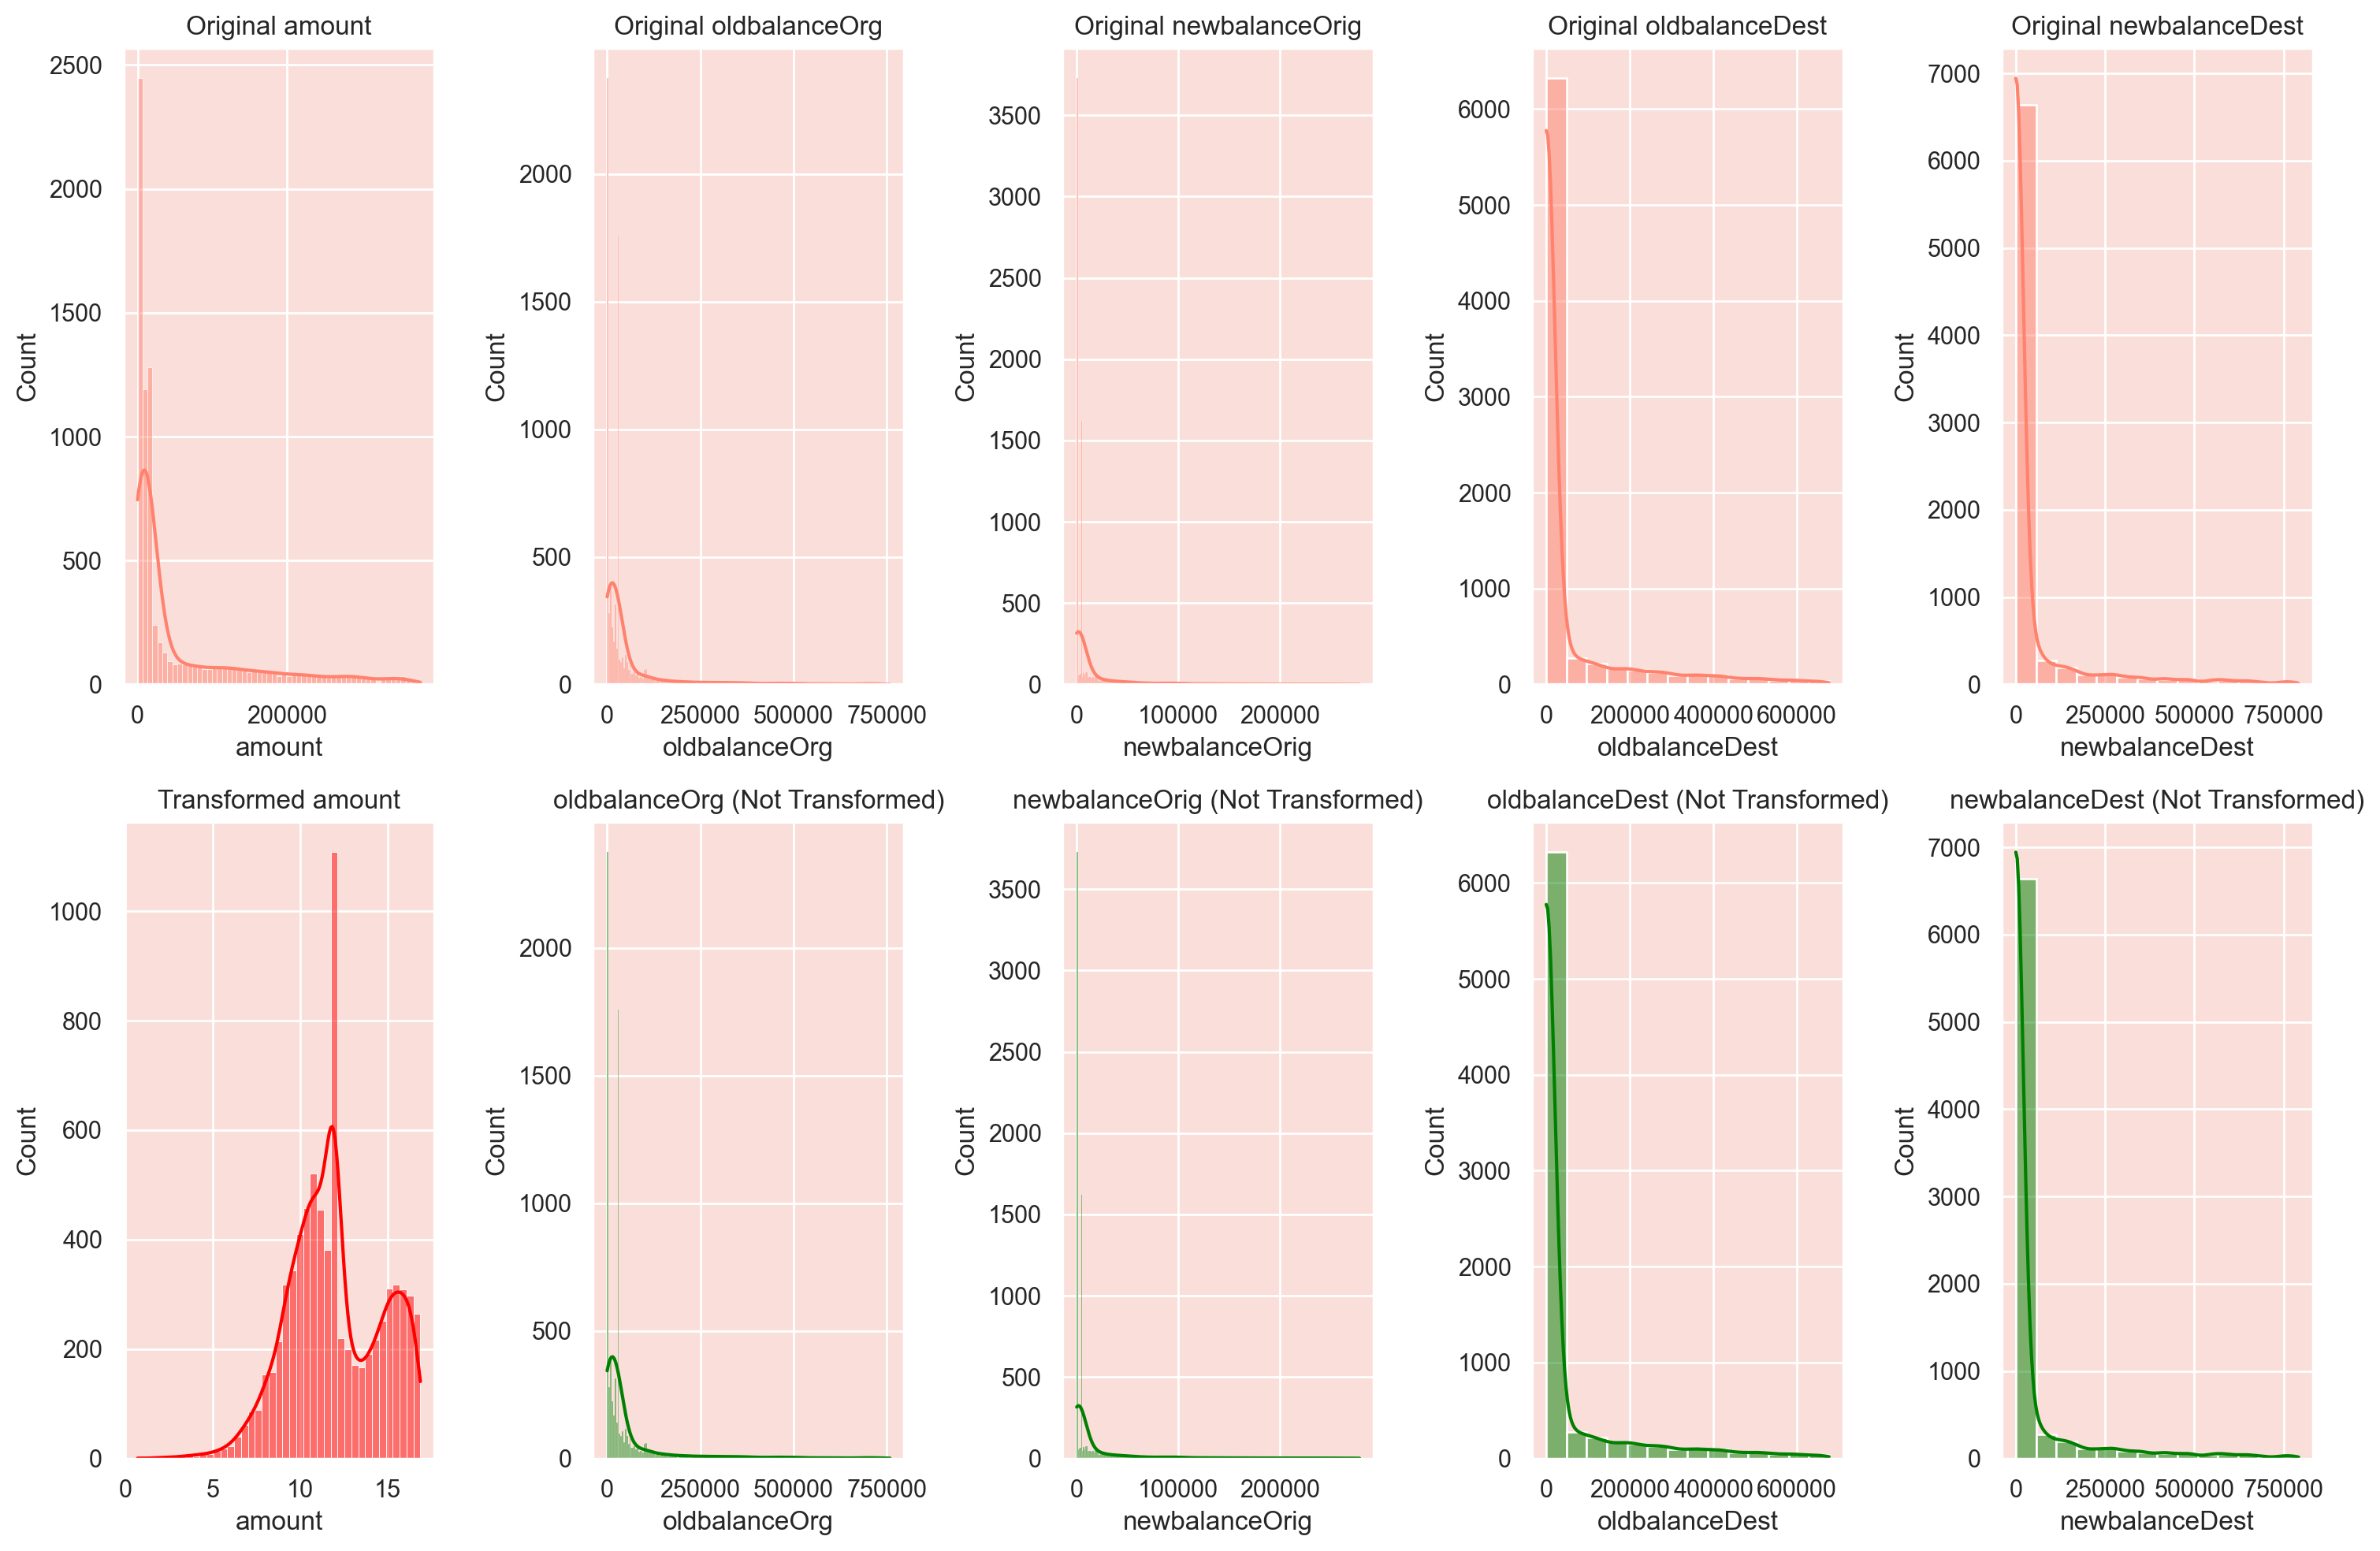

In [37]:
# Checking the distribution of the continuous features
fig, ax = plt.subplots(2, 5, figsize=(15,10))

# Original Distributions
for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde=True, ax=ax[0,i], color='#ff826e').set_title(f'Original {col}')
    

# Applying Box-Cox Transformation
# Dictionary to store lambda values for each feature
lambdas = {}

for i, col in enumerate(continuous_features):
    # Only apply box-cox for positive values
    
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        # Applying the same lambda to test data
        X_test[col] = boxcox(X_test[col], lmbda=lambdas[col]) 
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='red').set_title(f'Transformed {col}')
    else:
        sns.histplot(X_train[col], kde=True, ax=ax[1,i], color='green').set_title(f'{col} (Not Transformed)')

fig.tight_layout()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

This figure shows histograms of continuous financial features from a dataset. The top row displays the original distributions of features like the transaction amount, old and new balances for both origin and destination accounts. These original distributions are highly skewed, with most values concentrated near zero.

The bottom row shows the distributions after applying some transformation to the features, likely to reduce skewness and better reveal patterns in the data. The transformed distributions, especially for the transaction amount, appear more spread out and balanced, making it easier to analyze and interpret relationships between these features.

<a id="dt"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="dt_base"></a>
# <b><span style='color:#ff826e'>Step 6.1 |</span><span style='color:brown'> DT Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

First, let's define the base DT model:

In [38]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=42)

____
<a id="dt_hp"></a>
# <b><span style='color:#ff826e'>Step 6.2 |</span><span style='color:brown'> DT  Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:120%; text-align:left">

__🔍<span style="font-size:130%; color:brown"> Note: </span>__ In medical scenarios, especially in the context of diagnosing illnesses, it's often more important __to have a high recall (sensitivity) for the positive class (patients with the condition)__. A high recall ensures that most of the actual positive cases are correctly identified, even if it means some false positives (cases where healthy individuals are misclassified as having the condition). The rationale is that it's generally better to have a few false alarms than to miss out on diagnosing a patient with a potential illness.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

I am establishing a function to determine the optimal set of hyperparameters that yield the highest __recall__ for the model. This approach ensures a reusable framework for hyperparameter tuning of subsequent models:

In [39]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='recall', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest recall for class 1 is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our DT model:

In [40]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,5],
    'min_samples_split': [2, 3, 4,5],
    'min_samples_leaf': [1, 2,3]
}

In [41]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [42]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}


____
<a id="dt_eval"></a>
# <b><span style='color:#ff826e'>Step 6.3 |</span><span style='color:brown'> DT Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:115%; text-align:left">

Now let's evaluate our DT model performance on both the training and test datasets:

In [43]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7000
           1       0.88      0.96      0.92       799

    accuracy                           0.98      7799
   macro avg       0.94      0.97      0.96      7799
weighted avg       0.98      0.98      0.98      7799



In [44]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3000
           1       0.89      0.94      0.92       343

    accuracy                           0.98      3343
   macro avg       0.94      0.97      0.95      3343
weighted avg       0.98      0.98      0.98      3343



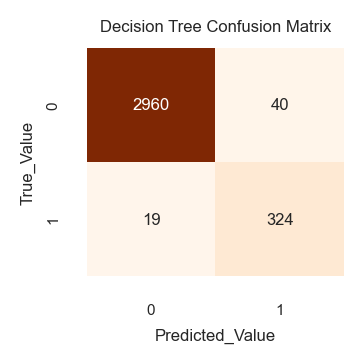

In [45]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_dt = confusion_matrix(y_test,best_dt.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_dt,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Decision Tree Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The confusion matrix shows the performance of a decision tree classifier:

- **2960**: True negatives (correctly predicted as not fraud).
- **324**: True positives (correctly predicted as fraud).
- **40**: False positives (incorrectly predicted as fraud).
- **19**: False negatives (incorrectly predicted as not fraud).

This indicates that the model performs well in identifying both fraud and non-fraud cases, with low false positive and negative rates.

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Let's create a function that consolidates each model's metrics into a dataframe, facilitating an end-to-end comparison of all models later:

In [46]:
def evaluate_model(model, X_test, y_test, model_name):
    """
    Evaluates the performance of a trained model on test data using various metrics.
    """
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Extracting metrics
    metrics = {
        "precision_0": report["0"]["precision"],
        "precision_1": report["1"]["precision"],
        "recall_0": report["0"]["recall"],
        "recall_1": report["1"]["recall"],
        "f1_0": report["0"]["f1-score"],
        "f1_1": report["1"]["f1-score"],
        "macro_avg_precision": report["macro avg"]["precision"],
        "macro_avg_recall": report["macro avg"]["recall"],
        "macro_avg_f1": report["macro avg"]["f1-score"],
        "accuracy": accuracy_score(y_test, y_pred)
    }
    
    # Convert dictionary to dataframe
    df = pd.DataFrame(metrics, index=[model_name]).round(2)
    
    return df

In [47]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')
dt_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
DT         0.99         0.89      0.99      0.94  0.99  0.92   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
DT                 0.94              0.97          0.95      0.98

In [48]:
X_test.shape

(3343, 11)

In [49]:
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

<a id="rf"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="rf_base"></a>
# <b><span style='color:#ff826e'>Step 7.1 |</span><span style='color:brown'> RF Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">

First, let's define the base RF model:

In [50]:
rf_base = RandomForestClassifier(random_state=25)

____
<a id="rf_hp"></a>
# <b><span style='color:#ff826e'>Step 7.2 |</span><span style='color:brown'> RF Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f;color:black; font-size:115%; text-align:left">
    
Afterward, I am setting up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our RF model:

In [51]:
param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

In [52]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)

RF Optimal Hyperparameters: 
 {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}


____
<a id="rf_eval"></a>
# <b><span style='color:#ff826e'>Step 7.3 |</span><span style='color:brown'> RF Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;font-size:115%; text-align:left">

Finally, I am evaluating the model's performance on both the training and test datasets:

In [53]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7000
           1       0.92      0.83      0.87       799

    accuracy                           0.97      7799
   macro avg       0.95      0.91      0.93      7799
weighted avg       0.97      0.97      0.97      7799



In [54]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3000
           1       0.90      0.81      0.85       343

    accuracy                           0.97      3343
   macro avg       0.94      0.90      0.92      3343
weighted avg       0.97      0.97      0.97      3343



<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The RF model's similar performance on both training and test data suggests it isn't overfitting.

In [55]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')
rf_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
RF         0.98          0.9      0.99      0.81  0.98  0.85   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
RF                 0.94               0.9          0.92      0.97

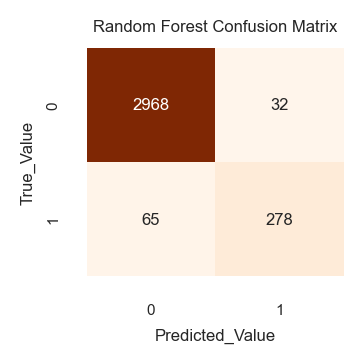

In [56]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_rf = confusion_matrix(y_test,best_rf.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_rf,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Random Forest Confusion Matrix')
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The confusion matrix for the random forest classifier shows:

- **2968**: True negatives.
- **278**: True positives.
- **32**: False positives.
- **65**: False negatives.

The model has a slightly higher false negative rate compared to the decision tree but a lower false positive rate, indicating a trade-off in detecting fraud.

<a id="logistic"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 | Logistic Regression Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="logistic_base"></a>
# <b><span style='color:#ff826e'>Step 8.1 |</span><span style='color:brown'> Logistic Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black;8; font-size:115%; text-align:left">

First of all, let's define the base LR model and set up the pipeline with scaling:

In [57]:
# Define the base logistic model and set up the pipeline with scaling
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('LR', LogisticRegression())
])

____
<a id="logistic_hp"></a>
# <b><span style='color:#ff826e'>Step 8.2 |</span><span style='color:brown'> Logistic Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color:#fbaa7f; color:black; font-size:115%; text-align:left">

I'll set up the hyperparameters grid and utilize the __tune_clf_hyperparameters__ function to pinpoint the optimal hyperparameters for our Logistic pipeline:

In [58]:
# Hyperparameter grid for Logistic Regression
# penalty - determines the regularization, and helps prevent overfitting by adding a penalty to the optimization objective.
# 'l1' refers to Lasso regularization, and 'l2' refers to Ridge regularization
# 'C' - inverse of the regularization strength, smaller values specify stronger regularization
# 'solver' - algorithm used for optimization in LR,  'liblinear' is suitable for small datasets, 'saga' for larger dataset
param_grid_logistic = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear']
}

In [59]:
logistic_base=LogisticRegression()


In [60]:
# Call the function for hyperparameter tuning with logistic regression
best_logistic, best_logistic_hyperparams = tune_clf_hyperparameters(logistic_base, param_grid_logistic, X_train, y_train)

# Print the optimal hyperparameters for logistic regression
print('Logistic Regression Optimal Hyperparameters: \n', best_logistic_hyperparams)

Logistic Regression Optimal Hyperparameters: 
 {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}


____
<a id="logistic_eval"></a>
# <b><span style='color:#ff826e'>Step 8.3 |</span><span style='color:brown'> Logistic Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Let's evaluate the model's performance on both the training and test datasets:

In [61]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_logistic.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7000
           1       0.79      0.82      0.81       799

    accuracy                           0.96      7799
   macro avg       0.89      0.90      0.89      7799
weighted avg       0.96      0.96      0.96      7799



In [62]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_logistic.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3000
           1       0.76      0.78      0.77       343

    accuracy                           0.95      3343
   macro avg       0.87      0.87      0.87      3343
weighted avg       0.95      0.95      0.95      3343



<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The Logistic model's consistent scores across training and test sets indicate no overfitting.

In [63]:
logistic_evaluation = evaluate_model(best_logistic, X_test, y_test, 'LR')
logistic_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
LR         0.97         0.76      0.97      0.78  0.97  0.77   

    macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
LR                 0.87              0.87          0.87      0.95

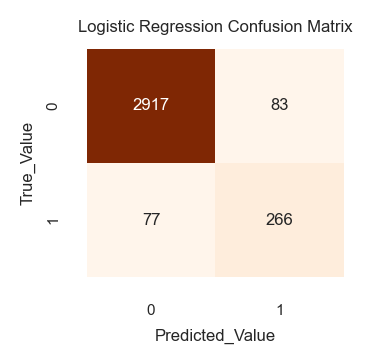

In [64]:
# Plotting the Confusion Matrix for Random Forest Algorithm
cm_lr = confusion_matrix(y_test,best_logistic.predict(X_test))
plt.figure(figsize=(1.8, 1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_lr,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The confusion matrix for the Logistic Regression classifier shows:

- **2917**: True negatives.
- **266**: True positives.
- **83**: False positives.
- **77**: False negatives.

The LR model balances the detection of fraud and non-fraud cases, with a relatively low number of both false positives and false negatives.

<a id="svm"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 | SVM Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

____
<a id="svm_base"></a>
# <b><span style='color:#ff826e'>Step 9.1 |</span><span style='color:brown'> SVM Base Model Definition</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

First, let's define the base SVM model and set up the pipeline with scaling:

In [65]:
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svm', SVC()) 
])

____
<a id="svm_hp"></a>
# <b><span style='color:#ff826e'>Step 9.2 |</span><span style='color:brown'> SVM Hyperparameter Tuning</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">
    
Let's configure the hyperparameters grid and employ the __tune_clf_hyperparameters__ function to determine the best hyperparameters for our SVM pipeline:

In [66]:
param_grid_svm = {
    'svm__C': [5],
    'svm__kernel': ['linear', 'rbf', 'poly'],
#     'svm__gamma': [2],
#     'svm__degree': [2,3,4]
}

In [67]:
# Call the function for hyperparameter tuning
best_svm, best_svm_hyperparams = tune_clf_hyperparameters(svm_pipeline, param_grid_svm, X_train, y_train)
print('SVM Optimal Hyperparameters: \n', best_svm_hyperparams)

SVM Optimal Hyperparameters: 
 {'svm__C': 5, 'svm__kernel': 'poly'}


____
<a id="svm_eval"></a>
# <b><span style='color:#ff826e'>Step 9.3 |</span><span style='color:brown'> SVM Model Evaluation</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

Let's evaluate our SVM model's performance on both the training and test datasets:

In [68]:
# Evaluate the optimized model on the train data
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7000
           1       0.87      0.95      0.91       799

    accuracy                           0.98      7799
   macro avg       0.93      0.97      0.95      7799
weighted avg       0.98      0.98      0.98      7799



In [69]:
# Evaluate the optimized model on the test data
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3000
           1       0.86      0.93      0.89       343

    accuracy                           0.98      3343
   macro avg       0.93      0.96      0.94      3343
weighted avg       0.98      0.98      0.98      3343



In [70]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')
svm_evaluation

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
SVM         0.99         0.86      0.98      0.93  0.99  0.89   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
SVM                 0.93              0.96          0.94      0.98

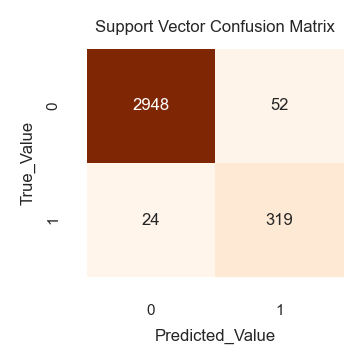

In [71]:
# Plotting the Confusion Matrix for Support Vector Classifier Algorithm
cm_svc = confusion_matrix(y_test, best_svm.predict(X_test))
plt.figure(figsize=(1.8,1.8))
sns.set_context('notebook',font_scale = 0.5)
sns.heatmap(cm_svc,annot=True,fmt='d', cmap="Oranges", cbar=False)
plt.title('Support Vector Confusion Matrix');
plt.xlabel("Predicted_Value")
plt.ylabel("True_Value")
plt.tight_layout()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color:black; font-size:115%; text-align:left">

The confusion matrix for the support vector machine (SVM) classifier shows:

- **2948**: True negatives.
- **319**: True positives.
- **52**: False positives.
- **24**: False negatives.

The SVM model balances the detection of fraud and non-fraud cases, with a relatively low number of both false positives and false negatives.

<a id="conclusion"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 | Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

In the critical context of diagnosing heart disease, our primary objective is __to ensure a high recall for the positive class__. It's imperative to accurately identify every potential heart disease case, as even one missed diagnosis could have dire implications. However, while striving for this high recall, it's essential to maintain a balanced performance to avoid unnecessary medical interventions for healthy individuals. We'll now evaluate our models against these crucial medical benchmarks.



<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

* __Scenario Summary:__

* __Accuracy__: Use when classes are balanced and the cost of false positives and false negatives is similar.
* __Precision__: Use when the cost of false positives is high.
* __Recall__: Use when the cost of false negatives is high.
* __F1 Score__: Use when you need a balance between precision and recall.



In [72]:
# Concatenate the dataframes
all_evaluations = [dt_evaluation, rf_evaluation, logistic_evaluation,svm_evaluation]
results = pd.concat(all_evaluations)


# Sort by 'recall_1'
results = results.sort_values(by='recall_1', ascending=False).round(2)
results

precision_0  precision_1  recall_0  recall_1  f1_0  f1_1  \
DT          0.99         0.89      0.99      0.94  0.99  0.92   
SVM         0.99         0.86      0.98      0.93  0.99  0.89   
RF          0.98         0.90      0.99      0.81  0.98  0.85   
LR          0.97         0.76      0.97      0.78  0.97  0.77   

     macro_avg_precision  macro_avg_recall  macro_avg_f1  accuracy  
DT                  0.94              0.97          0.95      0.98  
SVM                 0.93              0.96          0.94      0.98  
RF                  0.94              0.90          0.92      0.97  
LR                  0.87              0.87          0.87      0.95

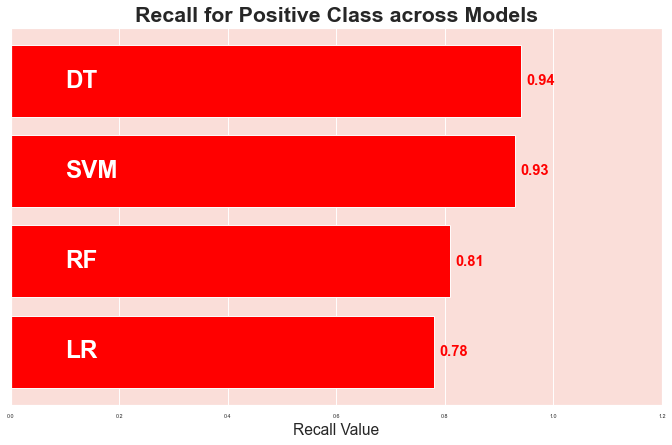

In [73]:
# Sort values based on 'recall_1'
results.sort_values(by='recall_1', ascending=True, inplace=True)
recall_1_scores = results['recall_1']

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 7), dpi=70)
ax.barh(results.index, recall_1_scores, color='red')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(recall_1_scores, results.index)):
    ax.text(value + 0.01, i, f"{value:.2f}", ha='left', va='center', fontweight='bold', color='red', fontsize=15)
    ax.text(0.1, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=25)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0, 1.2])

# Add title and xlabel
plt.title("Recall for Positive Class across Models", fontweight='bold', fontsize=22)
plt.xlabel('Recall Value', fontsize=16)
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

**Why I choose Decision Tree Model**

In this project, I evaluated five different models to predict. Through rigorous testing and comparison, the Decision Tree model emerged as the most effective choice. It consistently outperformed the others in terms of precision, recall, F1 score, and accuracy, demonstrating its robustness and reliability in handling the data. The Decision Tree’s ability to capture complex patterns in the dataset while maintaining high performance metrics makes it the optimal model for this task.



<a id="prediction"></a>
# <p style="background-color:#fbaa7f; font-family:calibri; color:brown; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12 | Prediction</p>

⬆️ [Table of Contents](#contents_tabel)

In [76]:
df_modified.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [77]:
# Function to make a prediction based on user input
def predict(features):
    return best_dt.predict(np.array(features).reshape(1, -1))

# Define feature names
feature_names = ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest','type_CASH_IN' , 'type_CASH_OUT', 'type_DEBIT','type_PAYMENT', 'type_TRANSFER']

# Create input widgets
feature_widgets = [widgets.FloatText(value=0.0, description=f'{feature}:') for feature in feature_names]

# Create a button for making predictions
predict_button = widgets.Button(description="Predict")

# Output widget to display prediction
output_widget = widgets.Output()

# Function to handle button click event
def on_button_click(b):
    user_input = [float(widget.value) for widget in feature_widgets]
    prediction = predict(user_input)

    # Display the prediction using IPython.display
    with output_widget:
        display(HTML(f"<b>Prediction:</b> {prediction[0]}"))

# Attach the button click event
predict_button.on_click(on_button_click)

# Display widgets and output area
display(*feature_widgets, predict_button, output_widget)


FloatText(value=0.0, description='step:')

FloatText(value=0.0, description='amount:')

FloatText(value=0.0, description='oldbalanceOrg:')

FloatText(value=0.0, description='newbalanceOrig:')

FloatText(value=0.0, description='oldbalanceDest:')

FloatText(value=0.0, description='newbalanceDest:')

FloatText(value=0.0, description='type_CASH_IN:')

FloatText(value=0.0, description='type_CASH_OUT:')

FloatText(value=0.0, description='type_DEBIT:')

FloatText(value=0.0, description='type_PAYMENT:')

FloatText(value=0.0, description='type_TRANSFER:')

Button(description='Predict', style=ButtonStyle())

Output()

<div style="border-radius:10px; padding: 15px; background-color: #fbaa7f; color: black; font-size:120%; text-align:left">

**Final Conclusion:**

In response to the growing threat of fraud in mobile financial transactions, this project set out to develop an accurate and efficient solution for real-time fraud detection. After evaluating five different machine learning models, the Decision Tree model was chosen as the best approach. It demonstrated superior performance across key metrics, including precision, recall, F1 score, and accuracy, making it the most effective tool for identifying fraudulent transactions quickly and accurately.

By implementing the Decision Tree model, we have created a robust and reliable system that not only enhances the security of mobile financial transactions but also maintains a seamless user experience. This solution significantly reduces the risk of financial losses, providing a strong safeguard against fraud in the ever-expanding mobile financial services industry.

<div style="display: flex; align-items: center; justify-content: center; border-radius: 10px; padding: 20px; background-color: #fbaa7f; color: black; font-size: 120%; text-align: center;">

<strong>🎯 If you need more information or want to explore the code, feel free to visit the project repository on <a href="https://github.com/Devarshi2/My-Capstone-Project--Fraud-Detection">GitHub</a> 🎯</strong>
</div>


<h2 align="left"><font color='red'>Best Regards!</font></h2>